### **`Business Understanding`**

**Objective**: The primary objective of this project is to predict fluctuations in the U.S. Dollar Index (DXY) using historical prices of Bitcoin, crude oil, and gold, alongside other influential factors such as economic trends and temporal variables. Additionally, the project aims to utilize these predictions to calculate and assess portfolio risk, providing actionable insights for more informed investment strategies.

**Business Questions**
1. Which classification model can better generalize the movement in the dollar index? 
2. How does volatility of each commodity market affect the dollar index movement? 
3. How can the predictive model be used to calculate and evaluate portfolio risk, helping investors optimize their asset allocation? 
4. What actionable insights can the predictive model offer for market forecasting and portfolio management strategies? 

### **`Data Understanding`**

**Objective**: merging different datasets into one

#### **Separate Dataset Preprocessing**
- At the End of this stage we will have different cleaned DataFrames, ready for a left join By date.
    - Standardize column names
    - Proper Dtypes
    - Date properties (holiday, weekday) changed to binary
    - Ensured about date Integrity for all DFs

##### **Importation of Packages and  Reading CSV**

In [19]:
# Data Manipulations & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from datetime import datetime
import holidays
import plotly.express as px
import math

# Time Series Analysis Packages
from statsmodels.tsa.seasonal import seasonal_decompose

#Data Preparation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Machine Learning Packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import LinearSegmentedColormap

# Evaluation & Model Persistance
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import joblib

#Utilities
import warnings
import os

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

In [20]:
oil_path = 'https://raw.githubusercontent.com/coderacheal/Inter-Market-Dynamics-Gold-Oil-Bitcoin-Dollar-Index/refs/heads/main/datasets/cleaned_oil.csv'
gold_path = 'https://raw.githubusercontent.com/coderacheal/Inter-Market-Dynamics-Gold-Oil-Bitcoin-Dollar-Index/refs/heads/main/datasets/cleaned_gold.csv'
btc_path = 'https://raw.githubusercontent.com/coderacheal/Inter-Market-Dynamics-Gold-Oil-Bitcoin-Dollar-Index/refs/heads/main/datasets/cleaned_btc.csv'
dxy_path = 'https://raw.githubusercontent.com/coderacheal/Inter-Market-Dynamics-Gold-Oil-Bitcoin-Dollar-Index/refs/heads/main/datasets/cleaned_dxy.csv'
date_path = 'https://raw.githubusercontent.com/coderacheal/Inter-Market-Dynamics-Gold-Oil-Bitcoin-Dollar-Index/refs/heads/main/datasets/date.csv'
holiday_path = 'https://raw.githubusercontent.com/coderacheal/Inter-Market-Dynamics-Gold-Oil-Bitcoin-Dollar-Index/refs/heads/main/datasets/holiday.csv'

In [21]:
df_oil = pd.read_csv(oil_path)
df_gold = pd.read_csv(gold_path)
df_dxy = pd.read_csv(dxy_path)
df_btc = pd.read_csv(btc_path)
df_date = pd.read_csv(date_path)
df_holiday = pd.read_csv(holiday_path)

##### **Oil DataFrame Preprocessing**

In [22]:
df_oil.head()

Date  oil_close  oil_open  oil_high  oil_low
0  2024-11-06      71.83     72.07     72.63    69.75
1  2024-11-05      71.99     71.62     72.67    71.29
2  2024-11-04      71.47     70.29     71.81    70.25
3  2024-11-01      69.49     70.44     71.45    69.32
4  2024-10-31      69.26     69.10     70.81    68.30

In [23]:
df_oil.dtypes

Date          object
oil_close    float64
oil_open     float64
oil_high     float64
oil_low      float64
dtype: object

In [24]:
# Convert Date to datetime
df_oil['Date'] = pd.to_datetime(df_oil['Date'])

In [25]:
df_oil.shape

(2858, 5)

In [26]:
# Check for start and end date
df_oil['Date'].min(), df_oil['Date'].max()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2024-11-06 00:00:00'))

##### **Gold DataFrame Preprocessing**

In [27]:
df_gold.head()

Date gold_close gold_open gold_high  gold_low
0  2024-11-06   2,668.00  2,754.40  2,758.70  2,660.75
1  2024-11-05   2,749.70  2,746.00  2,759.50  2,733.40
2  2024-11-04   2,746.20  2,743.50  2,757.50  2,739.40
3  2024-11-01   2,749.20  2,754.00  2,772.40  2,742.60
4  2024-10-31   2,749.30  2,799.10  2,801.20  2,741.80

In [28]:
df_gold.dtypes

Date          object
gold_close    object
gold_open     object
gold_high     object
gold_low      object
dtype: object

In [29]:
# Convert Date to datetime
df_gold['Date'] = pd.to_datetime(df_gold['Date'])

In [30]:
# Covert Object to Float
for col in ["gold_close", "gold_open", "gold_high", "gold_low"]:
    df_gold[col] = df_gold[col].str.replace(',', '').astype(float)

In [31]:
df_gold.shape

(2568, 5)

In [32]:
# Check for start and end date
df_gold['Date'].min(), df_gold['Date'].max()

(Timestamp('2014-11-03 00:00:00'), Timestamp('2024-11-06 00:00:00'))

##### **BTC DataFrame Preprocessing**

In [33]:
df_btc.head()

Unnamed: 0        Date  btc_open  btc_high   btc_low  btc_close
0           0  2024-10-21  69009.37  69408.10  66873.84   67525.97
1           1  2024-10-20  68364.18  69359.01  68105.72   69001.70
2           2  2024-10-19  68418.98  68668.01  68024.64   68362.73
3           3  2024-10-18  67419.11  68969.75  67177.82   68418.79
4           4  2024-10-17  67617.08  67912.21  66647.39   67399.84

In [34]:
df_btc.dtypes

Unnamed: 0      int64
Date           object
btc_open      float64
btc_high      float64
btc_low       float64
btc_close     float64
dtype: object

In [35]:
df_btc = df_btc.drop(columns=['Unnamed: 0'])

In [36]:
df_btc.shape

(3643, 5)

In [37]:
# Convert Date to datetime
df_btc['Date'] = pd.to_datetime(df_btc['Date'])

In [38]:
# Check for start and end date
df_gold['Date'].min(), df_gold['Date'].max()

(Timestamp('2014-11-03 00:00:00'), Timestamp('2024-11-06 00:00:00'))

##### **DXY DataFrame Preprocessing**

In [39]:
df_dxy.head()

Date  dxy_close  dxy_open  dxy_high  dxy_low  Vol. Change %
0  2024-11-06     105.16    103.70    105.44   103.70   NaN    1.68%
1  2024-11-05     103.42    103.91    103.96   103.37   NaN   -0.45%
2  2024-11-04     103.89    104.32    103.97   103.58   NaN   -0.37%
3  2024-11-01     104.28    103.86    104.35   103.68   NaN    0.29%
4  2024-10-31     103.98    104.08    104.22   103.82   NaN   -0.01%

In [40]:
# drop  vol, change columns
df_dxy = df_dxy.drop(columns=['Vol.', 'Change %'])

In [41]:
df_dxy.dtypes

Date          object
dxy_close    float64
dxy_open     float64
dxy_high     float64
dxy_low      float64
dtype: object

In [42]:
# Convert Date to datetime
df_dxy['Date'] = pd.to_datetime(df_dxy['Date'])

In [43]:
df_dxy.shape

(2832, 5)

In [44]:
# Check for start and end date
df_dxy['Date'].min(), df_dxy['Date'].max()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2024-11-06 00:00:00'))

##### **Date DataFrame Preprocessing**

In [45]:
df_date.head()

Unnamed: 0        Date        DoW  Month  Year
0           0  2014-11-01   Saturday     11  2014
1           1  2014-11-02     Sunday     11  2014
2           2  2014-11-03     Monday     11  2014
3           3  2014-11-04    Tuesday     11  2014
4           4  2014-11-05  Wednesday     11  2014

In [46]:
df_date = df_date.drop(columns=['Unnamed: 0'])

In [47]:
df_date['Date'] = pd.to_datetime(df_date['Date'])

In [48]:
df_date.shape

(3653, 4)

In [49]:
df_date['Date'].min(), df_date['Date'].max()

(Timestamp('2014-11-01 00:00:00'), Timestamp('2024-10-31 00:00:00'))

##### **Holiday DataFrame Preprocessing**

In [50]:
df_holiday = df_holiday[['Date','Title']]

In [51]:
df_holiday['Date'] = pd.to_datetime(df_holiday['Date'])

In [52]:
df_holiday.dtypes

Date     datetime64[ns]
Title            object
dtype: object

##### **Weekday DataFrame Creating**

In [53]:
# Define the date range (10 years)
start_date = datetime(2014, 1, 1)  # Start of the range
end_date = datetime(2024, 11, 6)    # End of the range
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

In [54]:
# Create a DataFrame with the date range
df_weekday = pd.DataFrame(date_range, columns=["Date"])

# Add a column indicating whether each date is a weekday
df_weekday["is_weekday"] = df_weekday["Date"].dt.weekday < 5  # Monday=0, Sunday=6

# Initialize the holidays for a specific country (e.g., United States)
us_holidays = holidays.UnitedStates(years=range(2014, 2025))

# Add a column indicating whether each date is a holiday
df_weekday["is_holiday"] = df_weekday["Date"].dt.date.isin(us_holidays)


In [55]:
df_weekday["is_weekday"] = df_weekday["is_weekday"].astype(int)
df_weekday["is_holiday"] = df_weekday["is_holiday"].astype(int)

In [56]:
df_weekday.tail()

Date  is_weekday  is_holiday
3958 2024-11-02           0           0
3959 2024-11-03           0           0
3960 2024-11-04           1           0
3961 2024-11-05           1           0
3962 2024-11-06           1           0

#### **Joining Stage**
- The Final Table
    - Daily Open, High, Low, Close Prices of commodities 
    - Daily Open, High, Low, Close Prices of Dollar Index
    - Date properties (holiday, weekday)
    - Proper Dtypes

In [57]:
# merge all dataframes
df = df_date \
    .merge(df_btc, on='Date', how='left') \
    .merge(df_oil, on='Date', how='left') \
    .merge(df_gold, on='Date', how='left') \
    .merge(df_dxy, on='Date', how='left') \
    .merge(df_weekday, on='Date', how='left') \
    .merge(df_holiday, on='Date', how='left')

In [58]:
df.head(10)

Date        DoW  Month  Year  btc_open  btc_high  btc_low  btc_close  \
0 2014-11-01   Saturday     11  2014    338.65    340.53   321.05     325.75   
1 2014-11-02     Sunday     11  2014    326.08    329.05   320.63     325.89   
2 2014-11-03     Monday     11  2014    325.57    334.00   325.48     327.55   
3 2014-11-04    Tuesday     11  2014    327.16    331.77   325.08     330.49   
4 2014-11-05  Wednesday     11  2014    330.68    343.37   330.68     339.49   
5 2014-11-06   Thursday     11  2014    339.46    352.97   338.42     349.29   
6 2014-11-07     Friday     11  2014    349.82    352.73   341.78     342.42   
7 2014-11-08   Saturday     11  2014    342.15    347.03   342.15     345.49   
8 2014-11-09     Sunday     11  2014    345.38    363.63   344.26     363.26   
9 2014-11-10     Monday     11  2014    362.27    374.82   357.56     366.92   

   oil_close  oil_open  oil_high  oil_low  gold_close  gold_open  gold_high  \
0        NaN       NaN       NaN      NaN         NaN        NaN        NaN   
1        NaN       NaN       NaN      NaN         NaN        NaN        NaN   
2      78.78     80.59     80.98    78.08      1169.8     1171.1     1173.4   
3      77.19     78.22     78.41    75.84      1167.7     1164.6     1175.0   
4      78.68     77.36     79.35    76.46      1145.7     1168.4     1169.3   
5      77.91     78.87     78.98    77.12      1142.6     1140.8     1149.0   
6      78.65     77.86     79.41    77.47      1169.8     1141.2     1179.0   
7        NaN       NaN       NaN      NaN         NaN        NaN        NaN   
8        NaN       NaN       NaN      NaN         NaN        NaN        NaN   
9      77.40     78.50     79.85    77.13      1159.8     1176.8     1177.5   

   gold_low  dxy_close  dxy_open  dxy_high  dxy_low  is_weekday  is_holiday  \
0       NaN        NaN       NaN       NaN      NaN           0           0   
1       NaN        NaN       NaN       NaN      NaN           0           0   
2    1161.0      87.31     87.08     87.41    87.02           1           0   
3    1163.4      86.98     87.25     87.30    86.88           1           0   
4    1137.1      87.44     87.01     87.61    86.94           1           0   
5    1137.2      88.01     87.43     88.15    87.13           1           0   
6    1130.4      87.64     88.06     88.19    87.47           1           0   
7       NaN        NaN       NaN       NaN      NaN           0           0   
8       NaN        NaN       NaN       NaN      NaN           0           0   
9    1146.7      87.81     87.43     87.83    87.22           1           0   

  Title  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  
5   NaN  
6   NaN  
7   NaN  
8   NaN  
9   NaN

In [59]:
df = df.sort_values(by='Date', ascending=False)

In [60]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

#### **Data Cleaning**

In [61]:
df.columns

Index(['Date', 'DoW', 'Month', 'Year', 'btc_open', 'btc_high', 'btc_low',
       'btc_close', 'oil_close', 'oil_open', 'oil_high', 'oil_low',
       'gold_close', 'gold_open', 'gold_high', 'gold_low', 'dxy_close',
       'dxy_open', 'dxy_high', 'dxy_low', 'is_weekday', 'is_holiday', 'Title'],
      dtype='object')

In [62]:
df.dtypes

Date          datetime64[ns]
DoW                   object
Month                  int64
Year                   int64
btc_open             float64
btc_high             float64
btc_low              float64
btc_close            float64
oil_close            float64
oil_open             float64
oil_high             float64
oil_low              float64
gold_close           float64
gold_open            float64
gold_high            float64
gold_low             float64
dxy_close            float64
dxy_open             float64
dxy_high             float64
dxy_low              float64
is_weekday             int32
is_holiday             int32
Title                 object
dtype: object

In [63]:
df.isna().sum()

Date             0
DoW              0
Month            0
Year             0
btc_open        10
btc_high        10
btc_low         10
btc_close       10
oil_close     1016
oil_open      1016
oil_high      1016
oil_low       1016
gold_close    1089
gold_open     1089
gold_high     1089
gold_low      1089
dxy_close     1043
dxy_open      1043
dxy_high      1043
dxy_low       1043
is_weekday       0
is_holiday       0
Title         3549
dtype: int64

In [64]:
df['Date'].min(), df['Date'].max()

(Timestamp('2014-11-01 00:00:00'), Timestamp('2024-10-31 00:00:00'))

In [65]:
##### Rearranging columns for easier analysis
new_column_order = ['Date', 'DoW', 'Month', 'Year', 
                    'btc_open', 'btc_high', 'btc_low','btc_close',
                    'oil_open', 'oil_high', 'oil_low', 'oil_close', 
                    'gold_open', 'gold_high', 'gold_low', 'gold_close',
                    'dxy_open', 'dxy_high', 'dxy_low', 'dxy_close', 
                    'is_holiday', 'is_weekday', 'Title']

df = df[new_column_order]

In [66]:
df.drop(columns=['Title'], inplace=True)

In [67]:
df.head()

Date        DoW  Month  Year  btc_open  btc_high  btc_low  \
3652 2024-10-31   Thursday     10  2024       NaN       NaN      NaN   
3651 2024-10-30  Wednesday     10  2024       NaN       NaN      NaN   
3650 2024-10-29    Tuesday     10  2024       NaN       NaN      NaN   
3649 2024-10-28     Monday     10  2024       NaN       NaN      NaN   
3648 2024-10-27     Sunday     10  2024       NaN       NaN      NaN   

      btc_close  oil_open  oil_high  oil_low  oil_close  gold_open  gold_high  \
3652        NaN     69.10     70.81    68.30      69.26     2799.1     2801.2   
3651        NaN     67.47     69.17    67.28      68.61     2786.9     2801.8   
3650        NaN     68.02     68.52    66.72      67.21     2741.9     2773.2   
3649        NaN     68.98     69.00    66.92      67.38     2749.2     2758.3   
3648        NaN       NaN       NaN      NaN        NaN        NaN        NaN   

      gold_low  gold_close  dxy_open  dxy_high  dxy_low  dxy_close  \
3652    2741.8      2749.3    104.08    104.22   103.82     103.98   
3651    2782.4      2800.8    104.25    104.44   103.98     103.99   
3650    2741.9      2768.8    104.31    104.64   104.21     104.32   
3649    2736.9      2755.9    104.32    104.57   104.12     104.32   
3648       NaN         NaN       NaN       NaN      NaN        NaN   

      is_holiday  is_weekday  
3652           0           1  
3651           0           1  
3650           0           1  
3649           0           1  
3648           0           0

#### **Exploratory Data Analysis**

In [68]:
df.describe().T

count                 mean                  min  \
Date          3653  2019-11-01 00:00:00  2014-11-01 00:00:00   
Month       3653.0              6.52231                  1.0   
Year        3653.0          2019.333425               2014.0   
btc_open    3643.0         18449.732976                176.9   
btc_high    3643.0         18865.656794               211.73   
btc_low     3643.0          18008.72678               171.51   
btc_close   3643.0         18467.017137                178.1   
oil_open    2637.0            61.894638                18.01   
oil_high    2637.0            62.903367                19.66   
oil_low     2637.0            60.817175                  6.5   
oil_close   2637.0              61.8703                11.57   
gold_open   2564.0          1586.926775               1051.5   
gold_high   2564.0          1597.223518               1062.7   
gold_low    2564.0          1576.451307               1045.4   
gold_close  2564.0          1586.808892               1049.6   
dxy_open    2610.0            97.762307                87.01   
dxy_high    2610.0            98.071498                 87.3   
dxy_low     2610.0            97.461854                86.88   
dxy_close   2610.0            97.773188                86.98   
is_holiday  3653.0             0.029565                  0.0   
is_weekday  3653.0             0.714208                  0.0   

                            25%                  50%                  75%  \
Date        2017-05-02 00:00:00  2019-11-01 00:00:00  2022-05-02 00:00:00   
Month                       4.0                  7.0                 10.0   
Year                     2017.0               2019.0               2022.0   
btc_open               1319.855              9314.13            29848.585   
btc_high               1339.595              9466.35             30391.11   
btc_low                1315.065              9149.39            29307.625   
btc_close               1334.84              9316.63             29859.74   
oil_open                  48.79                59.65                74.18   
oil_high                  49.46                 60.5                75.31   
oil_low                    47.9                58.75                73.01   
oil_close                  48.7                59.64                74.13   
gold_open              1258.175               1506.3             1863.725   
gold_high              1264.975              1517.05             1874.525   
gold_low               1251.875               1495.6              1848.35   
gold_close             1258.075               1507.9              1862.55   
dxy_open                94.2125                97.08                101.4   
dxy_high                  94.56               97.355               101.77   
dxy_low                  93.905               96.785             101.0475   
dxy_close                 94.21               97.095              101.395   
is_holiday                  0.0                  0.0                  0.0   
is_weekday                  0.0                  1.0                  1.0   

                            max           std  
Date        2024-10-31 00:00:00           NaN  
Month                      12.0      3.449345  
Year                     2024.0      2.897193  
btc_open               73079.38   20039.91454  
btc_high               73750.07  20480.738577  
btc_low                71334.09  19563.811246  
btc_close               73083.5  20052.330675  
oil_open                 120.66     17.514253  
oil_high                 126.42      17.76924  
oil_low                  118.52     17.228812  
oil_close                119.78     17.522667  
gold_open                2799.1     375.94326  
gold_high                2801.8    378.809995  
gold_low                 2782.4    373.174651  
gold_close               2800.8    376.033521  
dxy_open                 114.18      4.922919  
dxy_high                 114.78       4.96316  
dxy_low                  113.33      4.878896

##### **Distribution Analysis**

[]

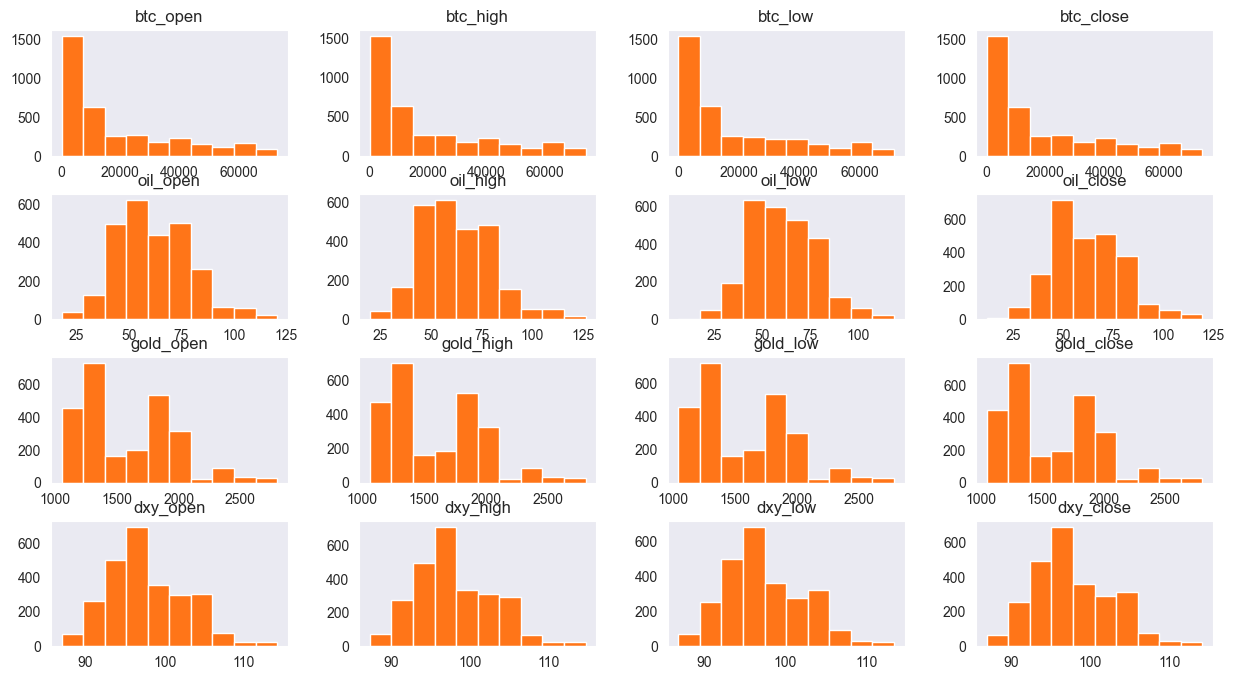

In [69]:
df.drop(columns=['Date', 'Month', 'Year', 'is_holiday', 'is_weekday']).hist(grid=False, color='#FF7518', figsize=(15, 8) )
plt.plot()

##### **Correlation Analysis**

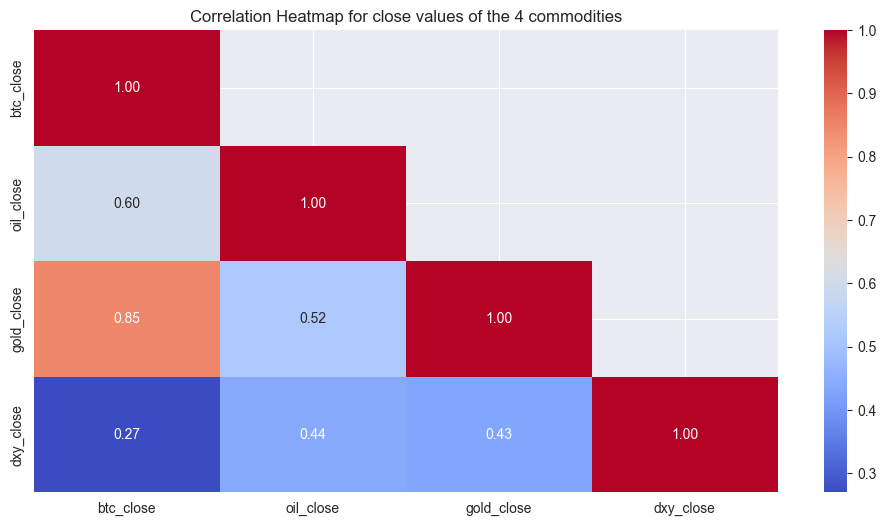

In [70]:
correlation_matrix = df[['btc_close', 'oil_close', 'gold_close', 'dxy_close']].corr().round(2)

# Modify the mask to exclude the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plot the heatmap with the modified mask to include the diagonal
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap for close values of the 4 commodities")
plt.show()

##### **Time Series Analysis**

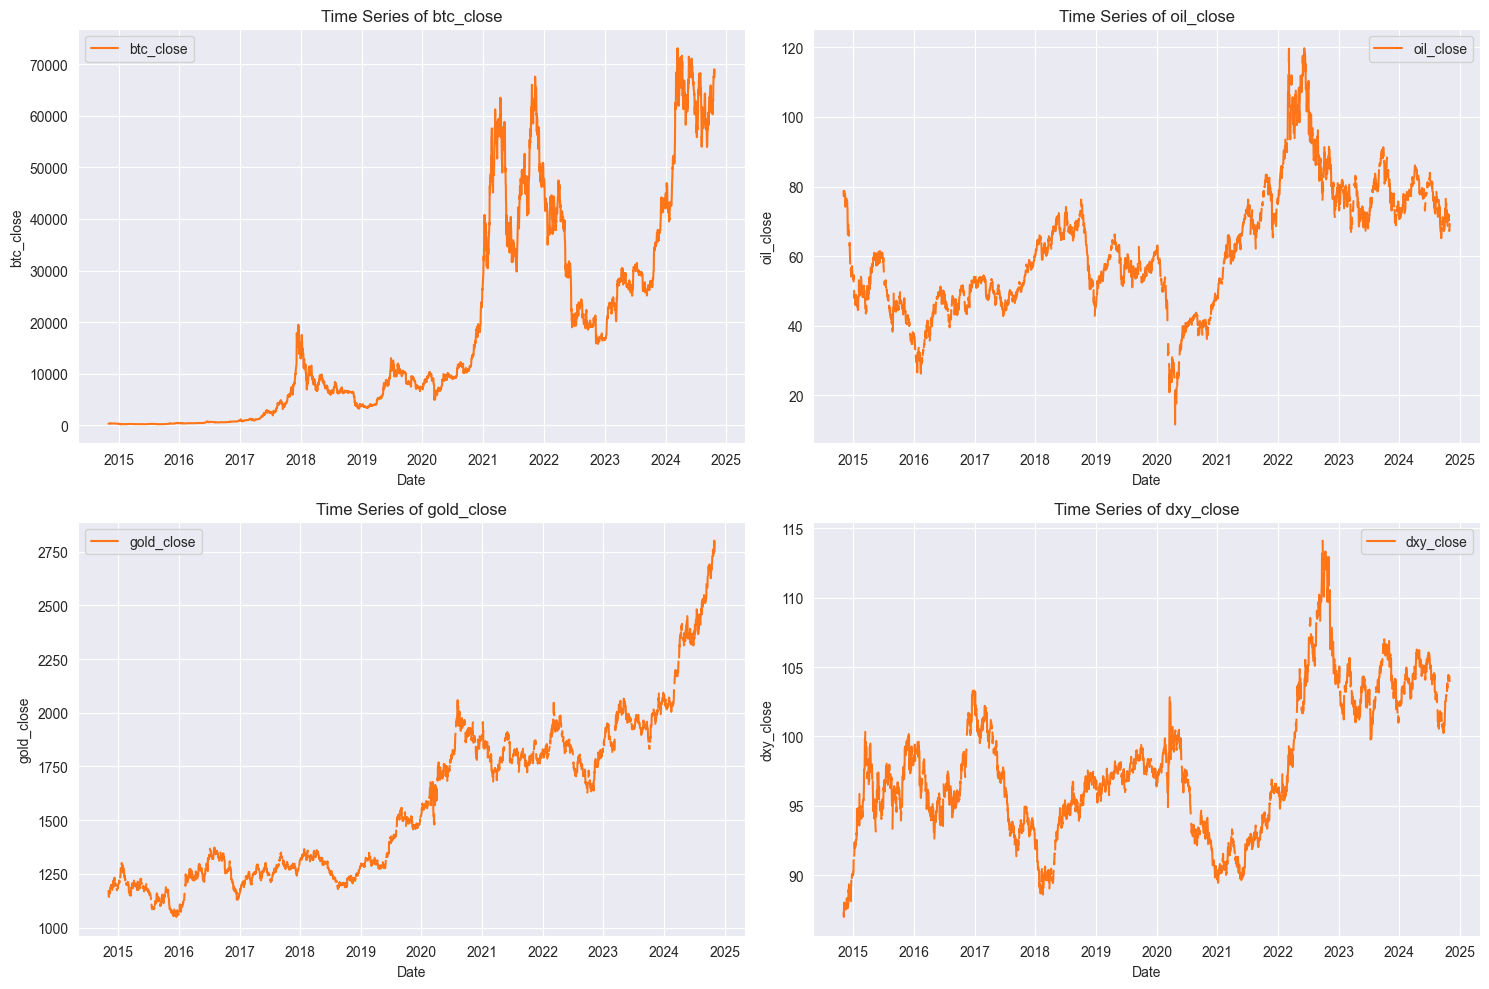

In [71]:
# Set Date as the index for time series analysis
df.set_index('Date', inplace=True)

# Ensure the dataset is sorted by date in ascending order
df = df.sort_index(ascending=True)


# List of variables to analyze
variables = ['btc_close', 'oil_close', 'gold_close', 'dxy_close']

# Plot time series of each variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    plt.plot(df[var], label=var, color='#FF7518')
    plt.title(f"Time Series of {var}")
    plt.xlabel("Date")
    plt.ylabel(var)
    plt.legend()

plt.tight_layout()
plt.show()

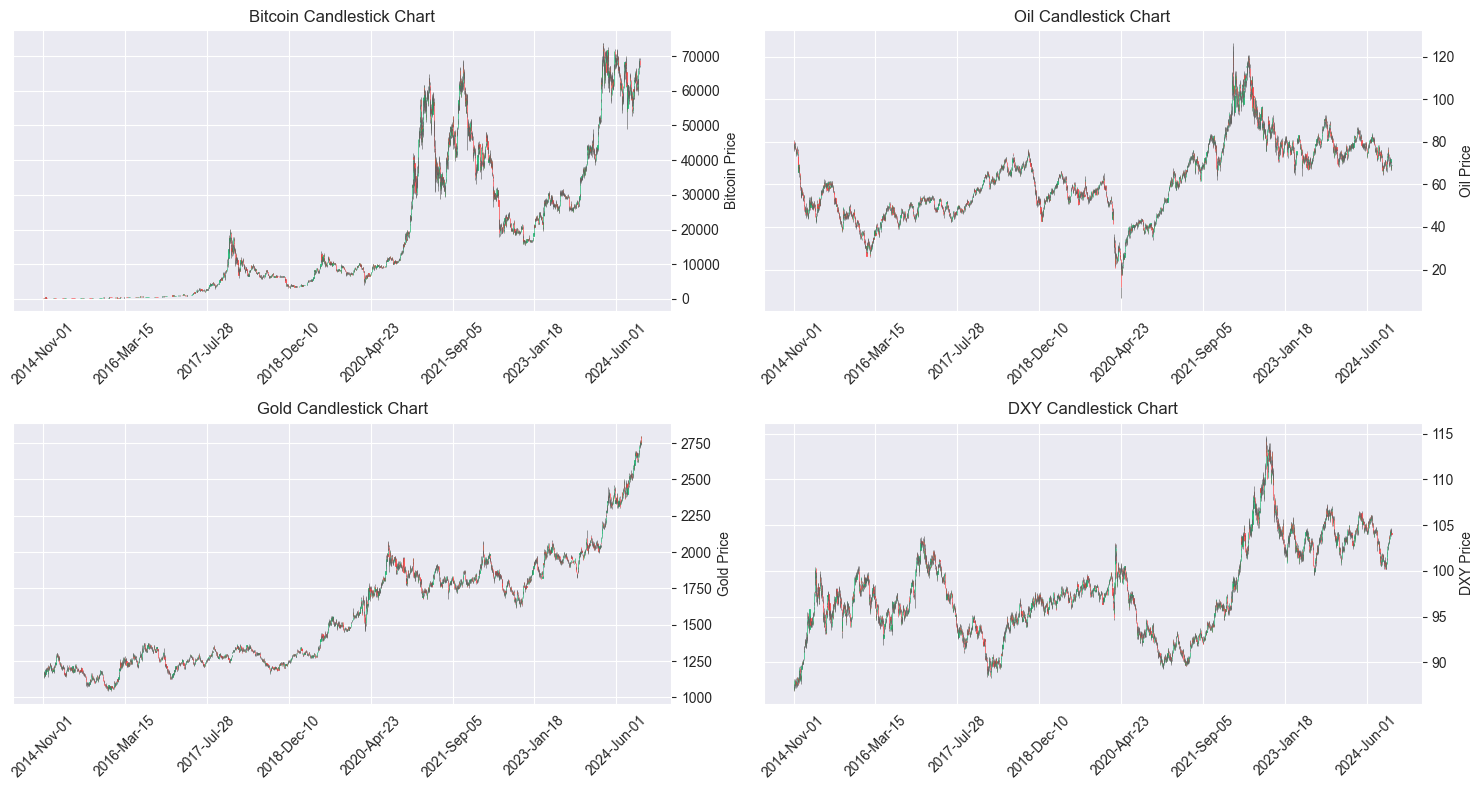

In [72]:
# List of commodities and their relevant columns
commodities = {
    'Bitcoin': ['btc_open', 'btc_high', 'btc_low', 'btc_close'],
    'Oil': ['oil_open', 'oil_high', 'oil_low', 'oil_close'],
    'Gold': ['gold_open', 'gold_high', 'gold_low', 'gold_close'],
    'DXY': ['dxy_open', 'dxy_high', 'dxy_low', 'dxy_close']
}

# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
axes = axes.flatten()  # Flatten the array for easier iteration

# Plot candlestick charts for each commodity
for ax, (name, columns) in zip(axes, commodities.items()):
    # Subset the data for the specific commodity
    df_commodity = df[columns]
    df_commodity.columns = ['Open', 'High', 'Low', 'Close']  # Rename for mplfinance compatibility
    df_commodity['Date'] = df.index  # Reset Date from index
    df_commodity.set_index('Date', inplace=True)
    
    # Generate the candlestick chart on the specific subplot
    mpf.plot(
        df_commodity,
        type='candle',
        ax=ax,  # Pass the specific subplot axis
        style='yahoo',
        ylabel=f'{name} Price'
    )
    ax.set_title(f'{name} Candlestick Chart')  # Set the title for each subplot

# Adjust layout
plt.tight_layout()
plt.show()

##### **Addictive and Multiplicative Decompositions**

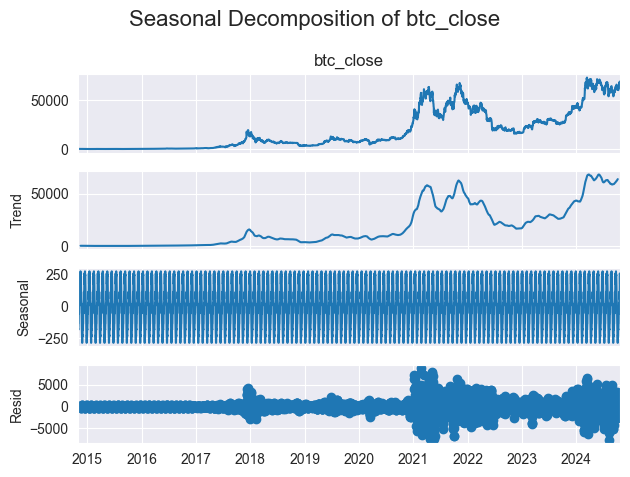

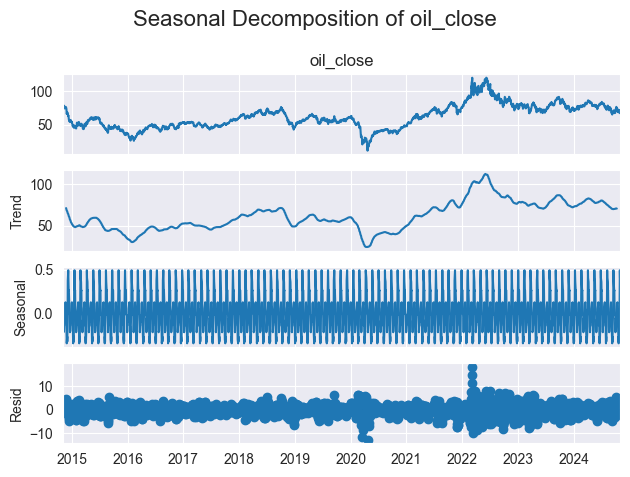

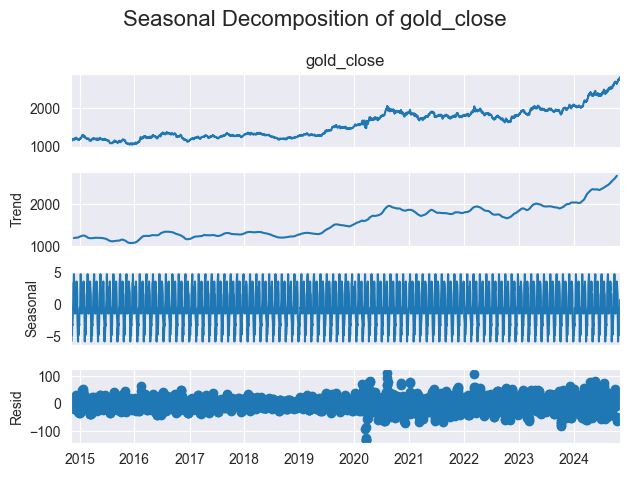

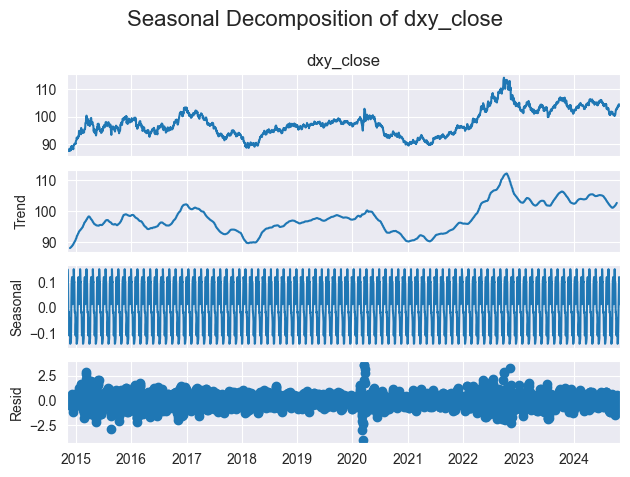

In [73]:
for variable in variables:
    decomposition = seasonal_decompose(df[variable].dropna(), model='additive', period=30)
    fig = decomposition.plot()
    fig.suptitle("") 
    plt.subplots_adjust(top=0.85) 
    plt.gcf().text(0.5, 0.95, f"Seasonal Decomposition of {variable}", fontsize=16, ha='center') 
    plt.show()

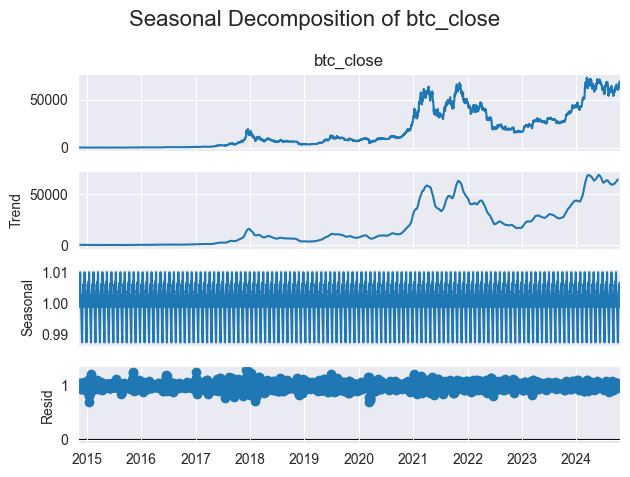

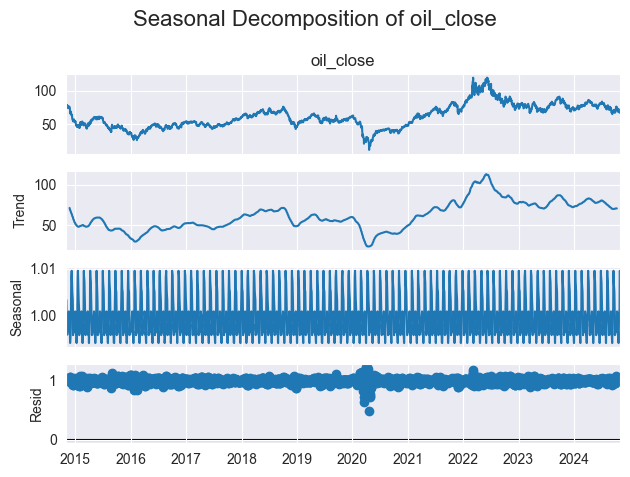

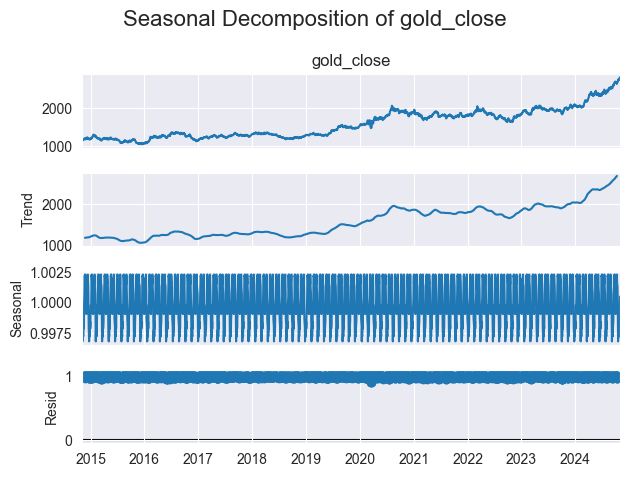

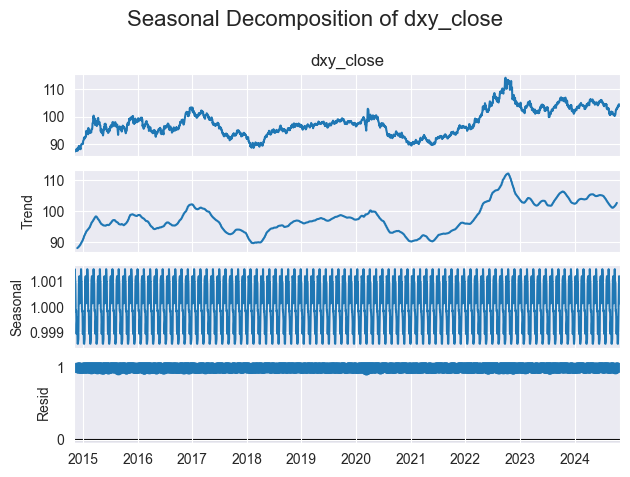

In [74]:
for variable in variables:
    decomposition = seasonal_decompose(df[variable].dropna(), model='multiplicative', period=30)
    fig = decomposition.plot()
    fig.suptitle("") 
    plt.subplots_adjust(top=0.85)  
    plt.gcf().text(0.5, 0.95, f"Seasonal Decomposition of {variable}", fontsize=16, ha='center')  
    plt.show()

##### **Outlier Analysis**

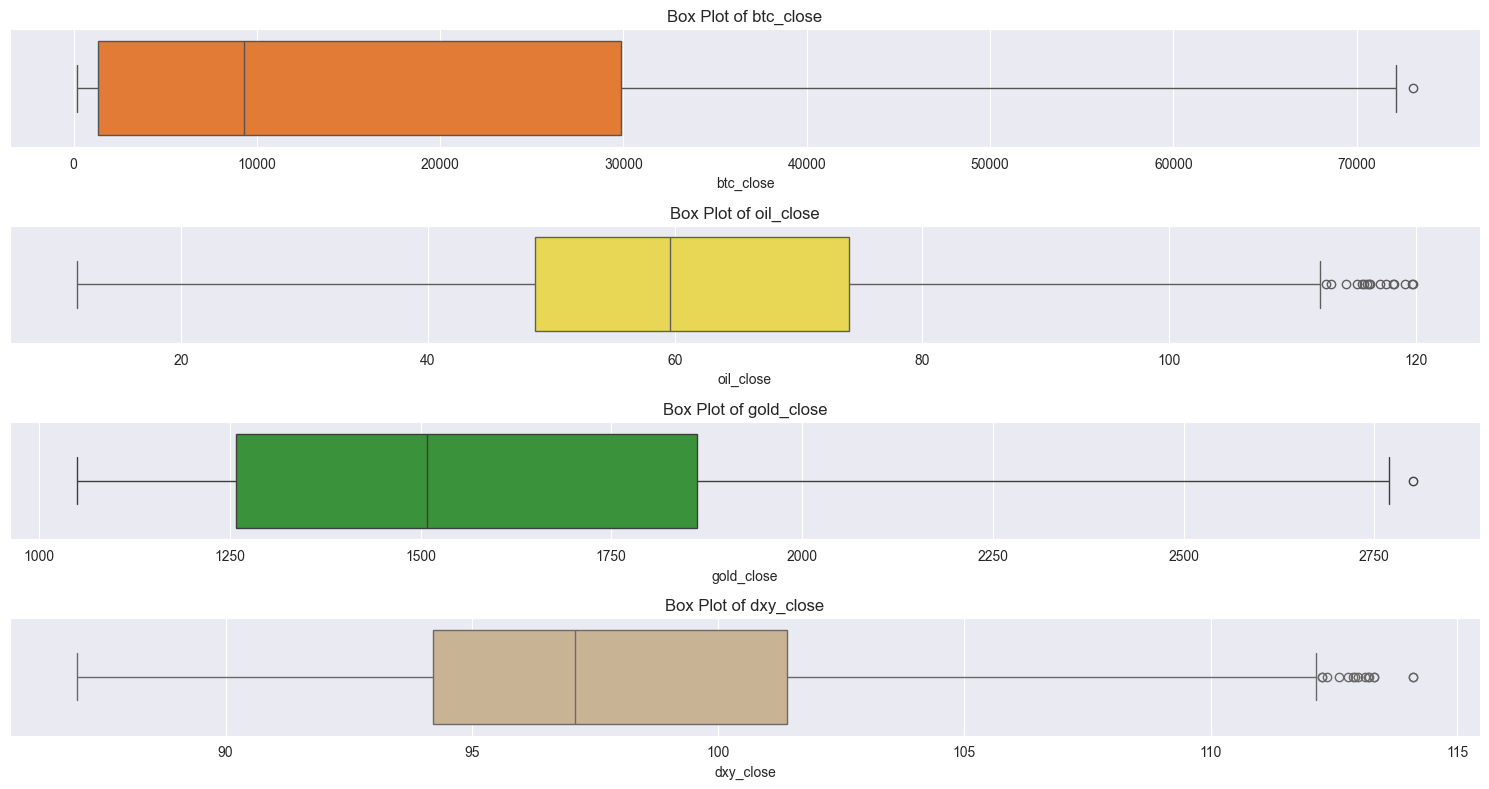

In [75]:
# List of columns to create boxplots for
variables = ['btc_close', 'oil_close', 'gold_close', 'dxy_close']
colors = ['#FF7518', '#FFEB3B', '#2CA02C', '#D2B48C']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 8), sharex=False)

# Generate horizontal boxplots for each variable
for i, var in enumerate(variables):
    sns.boxplot(x=df[var], ax=axes[i], orient='h', color=colors[i])
    axes[i].set_title(f"Box Plot of {var}")
    axes[i].set_xlabel(var)

# Adjust layout
plt.tight_layout()
plt.show()

#### **Feature Engineering**

##### **Imputation missing values using Linear Interpolation**
- Gold, oil, dxy related Columns don't have missing values, unless it's a holiday or weekend.
- For BTC we don't have null values except 1st 10 rows

**Decision:** using Linear interploation for imputing null values 

In [76]:
df.isna().sum()

DoW              0
Month            0
Year             0
btc_open        10
btc_high        10
btc_low         10
btc_close       10
oil_open      1016
oil_high      1016
oil_low       1016
oil_close     1016
gold_open     1089
gold_high     1089
gold_low      1089
gold_close    1089
dxy_open      1043
dxy_high      1043
dxy_low       1043
dxy_close     1043
is_holiday       0
is_weekday       0
dtype: int64

In [77]:
# Imputing missing values in the oil, gold, and dollar data with interpolation
cols = ['btc_open', 'btc_high', 'btc_low', 'btc_close',
        'oil_open', 'oil_high', 'oil_low', 'oil_close',
         'gold_open', 'gold_high', 'gold_low', 'gold_close',
        'dxy_close', 'dxy_open', 'dxy_high', 'dxy_low']

df[cols] = df[cols].interpolate(method='linear', axis=0)

In [78]:
df.isna().sum()

DoW           0
Month         0
Year          0
btc_open      0
btc_high      0
btc_low       0
btc_close     0
oil_open      2
oil_high      2
oil_low       2
oil_close     2
gold_open     2
gold_high     2
gold_low      2
gold_close    2
dxy_open      2
dxy_high      2
dxy_low       2
dxy_close     2
is_holiday    0
is_weekday    0
dtype: int64

In [79]:
df.head(15)

DoW  Month  Year  btc_open  btc_high  btc_low  btc_close  \
Date                                                                         
2014-11-01   Saturday     11  2014    338.65    340.53   321.05     325.75   
2014-11-02     Sunday     11  2014    326.08    329.05   320.63     325.89   
2014-11-03     Monday     11  2014    325.57    334.00   325.48     327.55   
2014-11-04    Tuesday     11  2014    327.16    331.77   325.08     330.49   
2014-11-05  Wednesday     11  2014    330.68    343.37   330.68     339.49   
2014-11-06   Thursday     11  2014    339.46    352.97   338.42     349.29   
2014-11-07     Friday     11  2014    349.82    352.73   341.78     342.42   
2014-11-08   Saturday     11  2014    342.15    347.03   342.15     345.49   
2014-11-09     Sunday     11  2014    345.38    363.63   344.26     363.26   
2014-11-10     Monday     11  2014    362.27    374.82   357.56     366.92   
2014-11-11    Tuesday     11  2014    365.86    371.31   363.73     367.70   
2014-11-12  Wednesday     11  2014    367.98    429.72   367.98     423.56   
2014-11-13   Thursday     11  2014    427.27    457.09   401.12     420.73   
2014-11-14     Friday     11  2014    418.42    419.25   384.79     397.82   
2014-11-15   Saturday     11  2014    399.65    405.53   371.01     376.13   

             oil_open   oil_high    oil_low  oil_close    gold_open  \
Date                                                                  
2014-11-01        NaN        NaN        NaN        NaN          NaN   
2014-11-02        NaN        NaN        NaN        NaN          NaN   
2014-11-03  80.590000  80.980000  78.080000  78.780000  1171.100000   
2014-11-04  78.220000  78.410000  75.840000  77.190000  1164.600000   
2014-11-05  77.360000  79.350000  76.460000  78.680000  1168.400000   
2014-11-06  78.870000  78.980000  77.120000  77.910000  1140.800000   
2014-11-07  77.860000  79.410000  77.470000  78.650000  1141.200000   
2014-11-08  78.073333  79.556667  77.356667  78.233333  1153.066667   
2014-11-09  78.286667  79.703333  77.243333  77.816667  1164.933333   
2014-11-10  78.500000  79.850000  77.130000  77.400000  1176.800000   
2014-11-11  77.180000  78.040000  76.420000  77.940000  1151.500000   
2014-11-12  77.500000  78.080000  76.630000  77.180000  1163.000000   
2014-11-13  76.950000  77.160000  74.070000  74.210000  1161.100000   
2014-11-14  74.360000  76.300000  73.250000  75.820000  1161.800000   
2014-11-15  74.883333  76.260000  73.736667  75.760000  1169.700000   

              gold_high     gold_low   gold_close   dxy_open  dxy_high  \
Date                                                                     
2014-11-01          NaN          NaN          NaN        NaN       NaN   
2014-11-02          NaN          NaN          NaN        NaN       NaN   
2014-11-03  1173.400000  1161.000000  1169.800000  87.080000     87.41   
2014-11-04  1175.000000  1163.400000  1167.700000  87.250000     87.30   
2014-11-05  1169.300000  1137.100000  1145.700000  87.010000     87.61   
2014-11-06  1149.000000  1137.200000  1142.600000  87.430000     88.15   
2014-11-07  1179.000000  1130.400000  1169.800000  88.060000     88.19   
2014-11-08  1178.500000  1135.833333  1166.466667  87.850000     88.07   
2014-11-09  1178.000000  1141.266667  1163.133333  87.640000     87.95   
2014-11-10  1177.500000  1146.700000  1159.800000  87.430000     87.83   
2014-11-11  1172.500000  1145.500000  1163.000000  87.810000     88.06   
2014-11-12  1169.400000  1156.500000  1159.100000  87.600000     87.90   
2014-11-13  1167.400000  1153.000000  1161.500000  87.810000     87.88   
2014-11-14  1192.900000  1146.000000  1185.600000  87.800000     88.27   
2014-11-15  1193.133333  1157.600000  1184.900000  87.703333     88.18   

              dxy_low  dxy_close  is_holiday  is_weekday  
Date                                                      
2014-11-01        NaN        NaN           0           0  
2014-11-02        NaN        NaN           0   

#### **Creating weekly and monthly moving averages Based on Close Prices**
- {asset}_weekly_avg
- {asset}_monthly_avg

In [80]:
# Asset categories and their respective price types
assets = {
    'btc': 'btc_close',
    'oil': 'oil_close',
    'gold': 'gold_close',
    'dxy': 'dxy_close'
}

for asset, name in assets.items():
    df[f'{asset}_weekly_avg'] = df[name].rolling(window=7, min_periods=1).mean()
    df[f'{asset}_monthly_avg'] = df[name].rolling(window=30, min_periods=1).mean()


In [81]:
df.columns

Index(['DoW', 'Month', 'Year', 'btc_open', 'btc_high', 'btc_low', 'btc_close',
       'oil_open', 'oil_high', 'oil_low', 'oil_close', 'gold_open',
       'gold_high', 'gold_low', 'gold_close', 'dxy_open', 'dxy_high',
       'dxy_low', 'dxy_close', 'is_holiday', 'is_weekday', 'btc_weekly_avg',
       'btc_monthly_avg', 'oil_weekly_avg', 'oil_monthly_avg',
       'gold_weekly_avg', 'gold_monthly_avg', 'dxy_weekly_avg',
       'dxy_monthly_avg'],
      dtype='object')

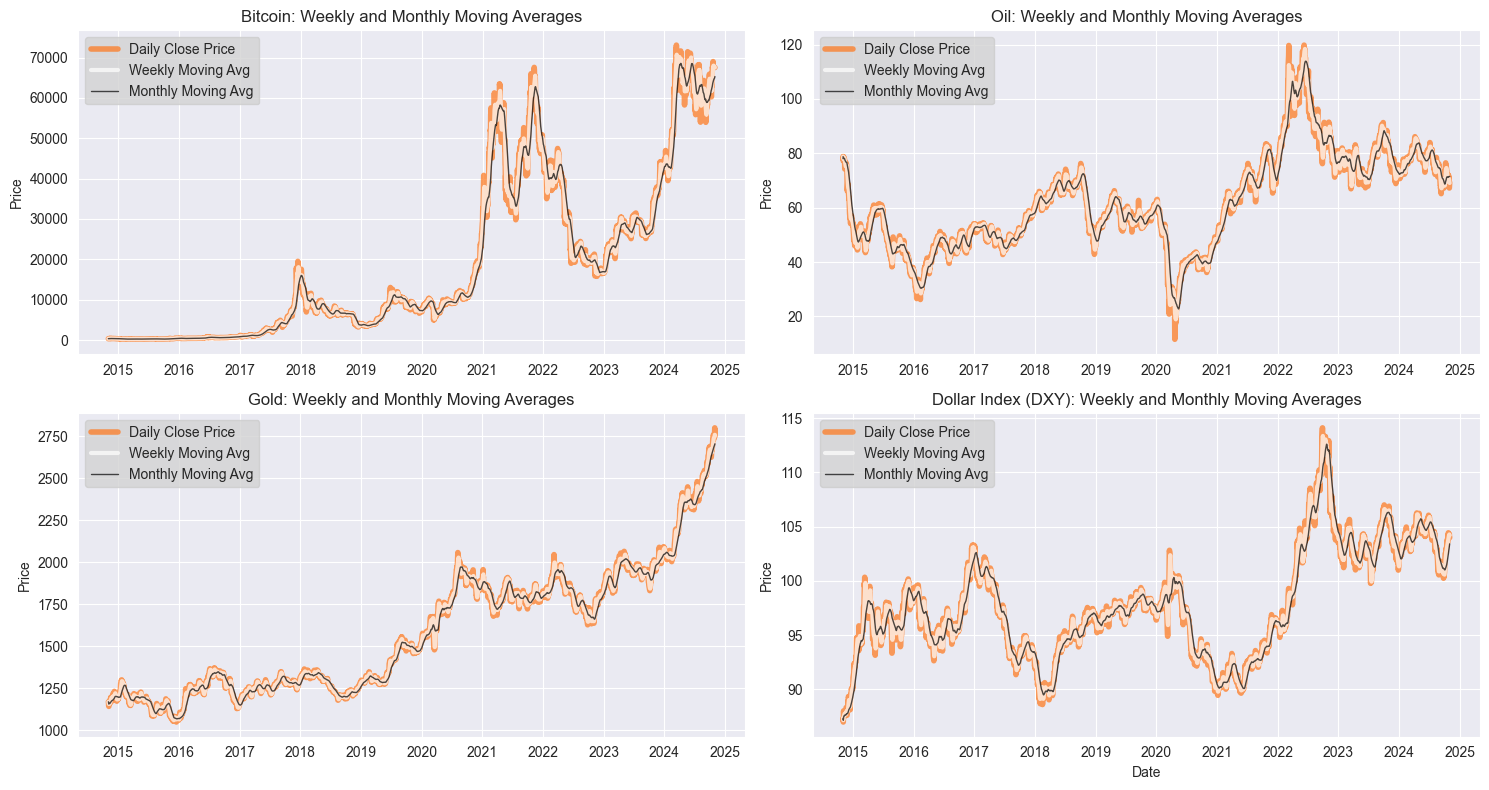

In [82]:
# Set a figure size suitable for 2x2 plots
fig, axs = plt.subplots(2, 2, figsize=(15, 8))  # Adjust figsize as needed

assets = {
    'btc': 'Bitcoin',
    'oil': 'Oil',
    'gold': 'Gold',
    'dxy': 'Dollar Index (DXY)'
}

# Iterate over assets and plot on each subplot
row = 0
col = 0
for asset, name in assets.items():
    # Plot on current subplot
    ax = axs[row, col]

    # Plot daily close prices with lower opacity
    ax.plot(df.index, df[f'{asset}_close'], label='Daily Close Price', color='#FF7518',alpha=0.7, linewidth=4)
    # Weekly moving average with solid line
    ax.plot(df.index, df[f'{asset}_weekly_avg'], label='Weekly Moving Avg', color='white', alpha=0.7, linewidth=3)
    # Monthly moving average with a dashed line
    ax.plot(df.index, df[f'{asset}_monthly_avg'], label='Monthly Moving Avg', color='black', alpha=0.7, linewidth=1)

    # Set title, labels, and grid for each subplot
    ax.set_title(f'{name}: Weekly and Monthly Moving Averages')
    ax.set_ylabel('Price')
    ax.legend(loc='upper left',facecolor='lightgray')
    ax.grid(True)

    # Update row and col for next subplot
    col += 1
    if col == 2:  # Move to next row after filling the current row
        col = 0
        row += 1

# Set common x-label for all subplots
plt.xlabel('Date')
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


#### **Creating weekly and monthly percentage change in moving averages**
- {asset}_weekly_avg_pct_change
- {asset}_monthly_avg_pct_change

In [83]:
# Asset categories and their respective price types
assets = {
    'btc': 'btc',
    'oil': 'oil',
    'gold': 'gold',
    'dxy': 'dxy'
}

for asset, name in assets.items():
    df[f'{asset}_weekly_avg_pct_change'] = df[f'{asset}_weekly_avg'].pct_change() * 100
    df[f'{asset}_monthly_avg_pct_change'] = df[f'{asset}_monthly_avg'].pct_change() * 100

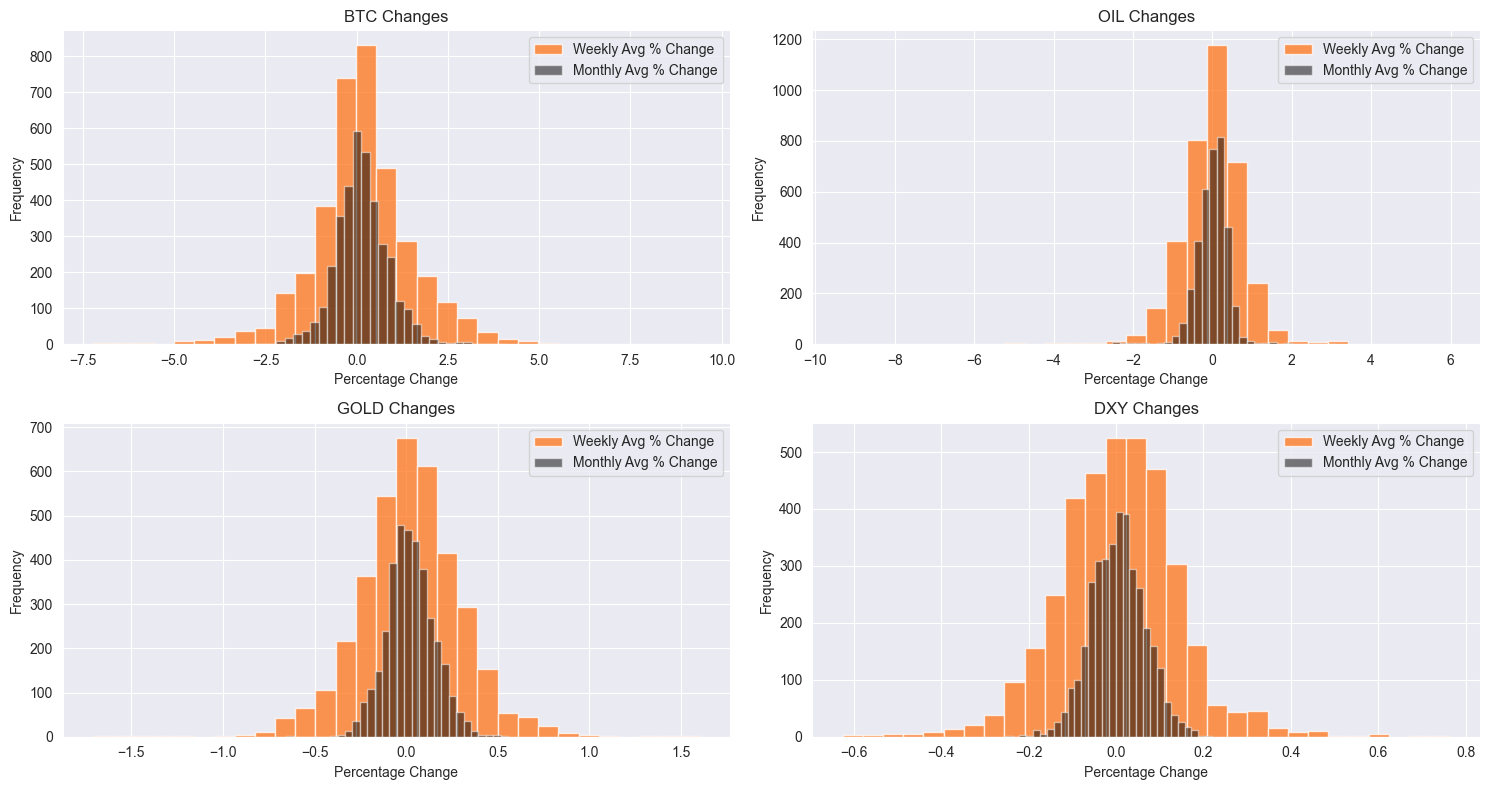

In [84]:
# Assuming df is your DataFrame and it contains the necessary columns
assets = ['btc', 'oil', 'gold', 'dxy']  # List of your assets
fig, axs = plt.subplots(2, 2, figsize=(15, 8))  # 2 rows, 2 columns

# Flattening the array of axes for easy indexing
axs = axs.flatten()

for i, asset in enumerate(assets):
    # Plotting weekly average percent change
    axs[i].hist(df[f'{asset}_weekly_avg_pct_change'].dropna(), bins=30, color='#FF7518', alpha=0.75, label='Weekly Avg % Change')
    
    # Plotting monthly average percent change
    axs[i].hist(df[f'{asset}_monthly_avg_pct_change'].dropna(), bins=30, color='black', alpha=0.5, label='Monthly Avg % Change')
    
    axs[i].set_title(f'{asset.upper()} Changes')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xlabel('Percentage Change')
    axs[i].legend()
    axs[i].grid(True)


# Adjust spacing to prevent overlap of subplots
plt.tight_layout()

plt.show()

#### **Creating Daily percentage changes for all 4 commodities**
- {asset}_Daily_ocpercentage --> change open and close
- {asset}_Daily_max_percentage --> change open and high
- {asset}_Daily_min_percentage --> change open and low

In [85]:
# Asset categories and their respective price types
assets = {
    'btc': ['btc_open', 'btc_close', 'btc_high', 'btc_low'],
    'oil': ['oil_open', 'oil_close', 'oil_high', 'oil_low'],
    'gold': ['gold_open', 'gold_close', 'gold_high', 'gold_low'],
    'dxy': ['dxy_open', 'dxy_close', 'dxy_high', 'dxy_low']
}

# Calculate daily percentage changes
for asset, cols in assets.items():
    open_col, close_col, high_col, low_col = cols
    df[f'{asset}_Daily_ocpercentage'] = ((df[open_col] - df[close_col]) / df[open_col] * 100)
    df[f'{asset}_Daily_max_percentage'] = ((df[high_col] - df[close_col]) / df[open_col] * 100)
    df[f'{asset}_Daily_min_percentage'] = ((df[low_col] - df[close_col]) / df[open_col] * 100)

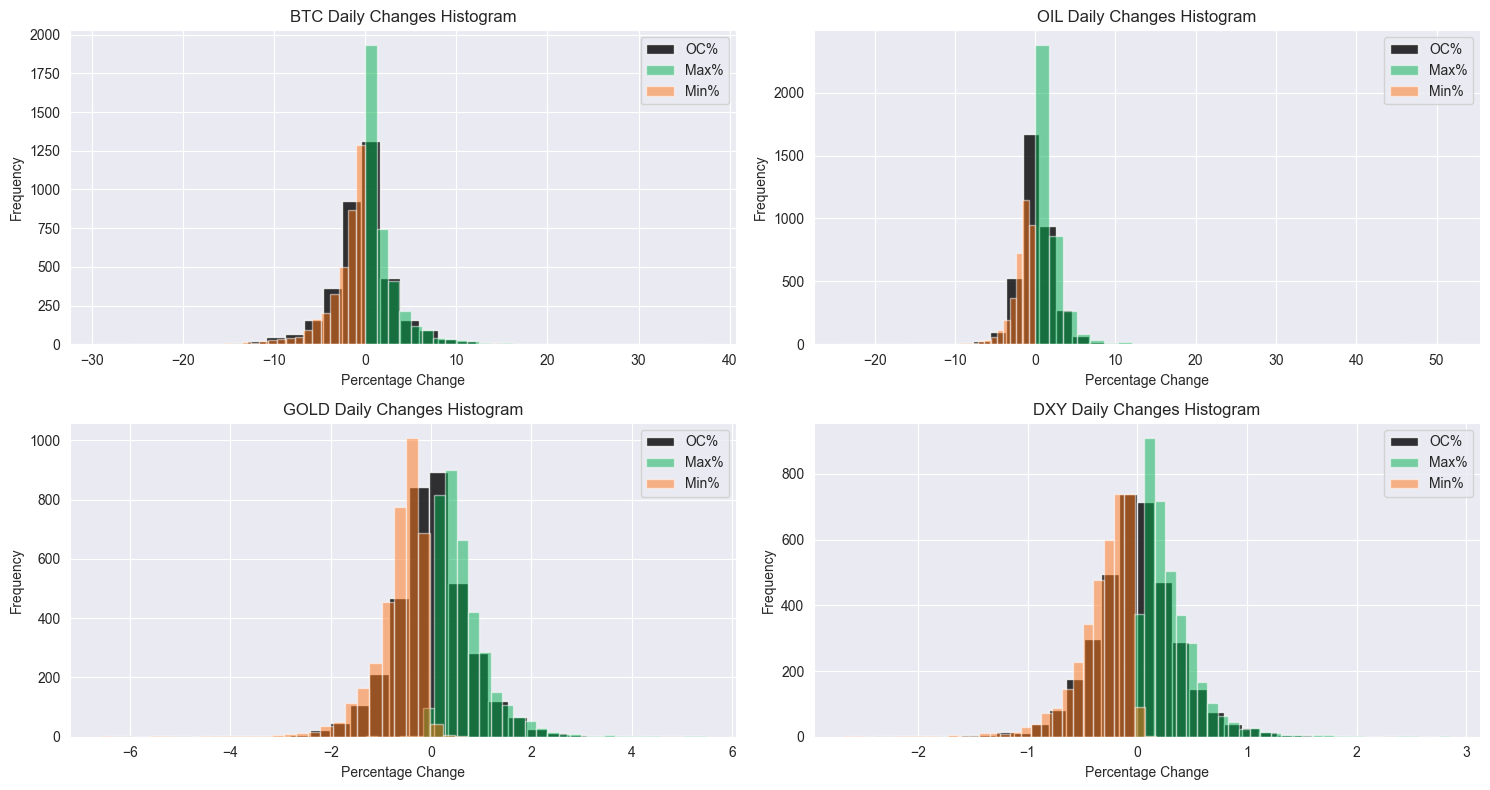

In [86]:
# Assuming df is your DataFrame and it contains the necessary columns
assets = ['btc', 'oil', 'gold', 'dxy']  # List of your assets
fig, axs = plt.subplots(2, 2, figsize=(15, 8))  # 2 rows, 2 columns

# Background color for the plot

# Flattening the array of axes for easy indexing
axs = axs.flatten()

for i, asset in enumerate(assets):
    # Plot histograms for the daily percentage changes
    axs[i].hist(df[f'{asset}_Daily_ocpercentage'].dropna(), bins=30, alpha=0.8, label='OC%', color='black')
    axs[i].hist(df[f'{asset}_Daily_max_percentage'].dropna(), bins=30, alpha=0.5, label='Max%', color='#00b050')
    axs[i].hist(df[f'{asset}_Daily_min_percentage'].dropna(), bins=30, alpha=0.5, label='Min%', color='#FF7518')
    
    axs[i].set_title(f'{asset.upper()} Daily Changes Histogram')
    axs[i].set_xlabel('Percentage Change')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()
    axs[i].grid(True)
      # Setting a light blue background for each subplot

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

#### **Creating Intraday Volatility**
- {asset}_intraday_volatility --> (difference high and low) / close

In [87]:
# Calculate intraday volatility as the percentage difference between high and low prices
assets = ['btc', 'oil', 'gold', 'dxy']  

for asset in assets:
    df[f'{asset}_intraday_volatility'] = ((df[f'{asset}_high'] - df[f'{asset}_low']) / df[f'{asset}_close']) * 100

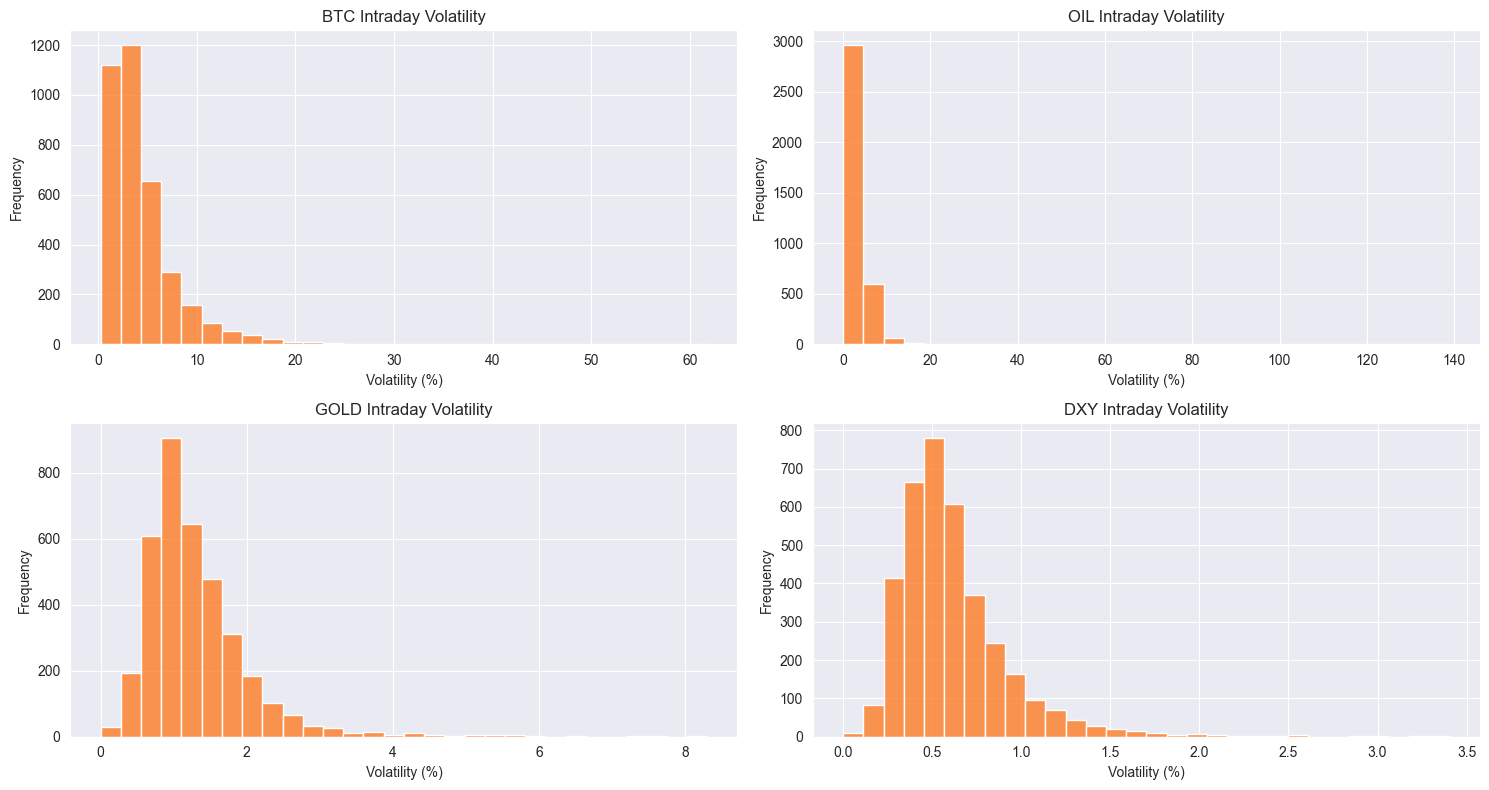

In [88]:
# Assuming df is your DataFrame and it contains the necessary columns
assets = ['btc', 'oil', 'gold', 'dxy']  # List of your assets
fig, axs = plt.subplots(2, 2, figsize=(15, 8))  # 2 rows, 2 columns

# Background color for the plot

# Flattening the array of axes for easy indexing
axs = axs.flatten()

for i, asset in enumerate(assets):
    # Plotting the intraday volatility histogram using seaborn
    sns.histplot(df[f'{asset}_intraday_volatility'].dropna(), bins=30, ax=axs[i], color='#FF7518')
    axs[i].set_title(f'{asset.upper()} Intraday Volatility')
    axs[i].set_xlabel('Volatility (%)')
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

plt.show()


#### **Creating day by day percentage change**
- {asset}_daily_percentage --> percentage difference between today close and yesterday close

In [89]:
# Calculate rolling volatility of daily percentage changes over 7-day and 30-day windows
for asset in assets:
    # Daily percentage change
    df[f'{asset}_daily_percentage'] = df[f'{asset}_close'].pct_change() * 100

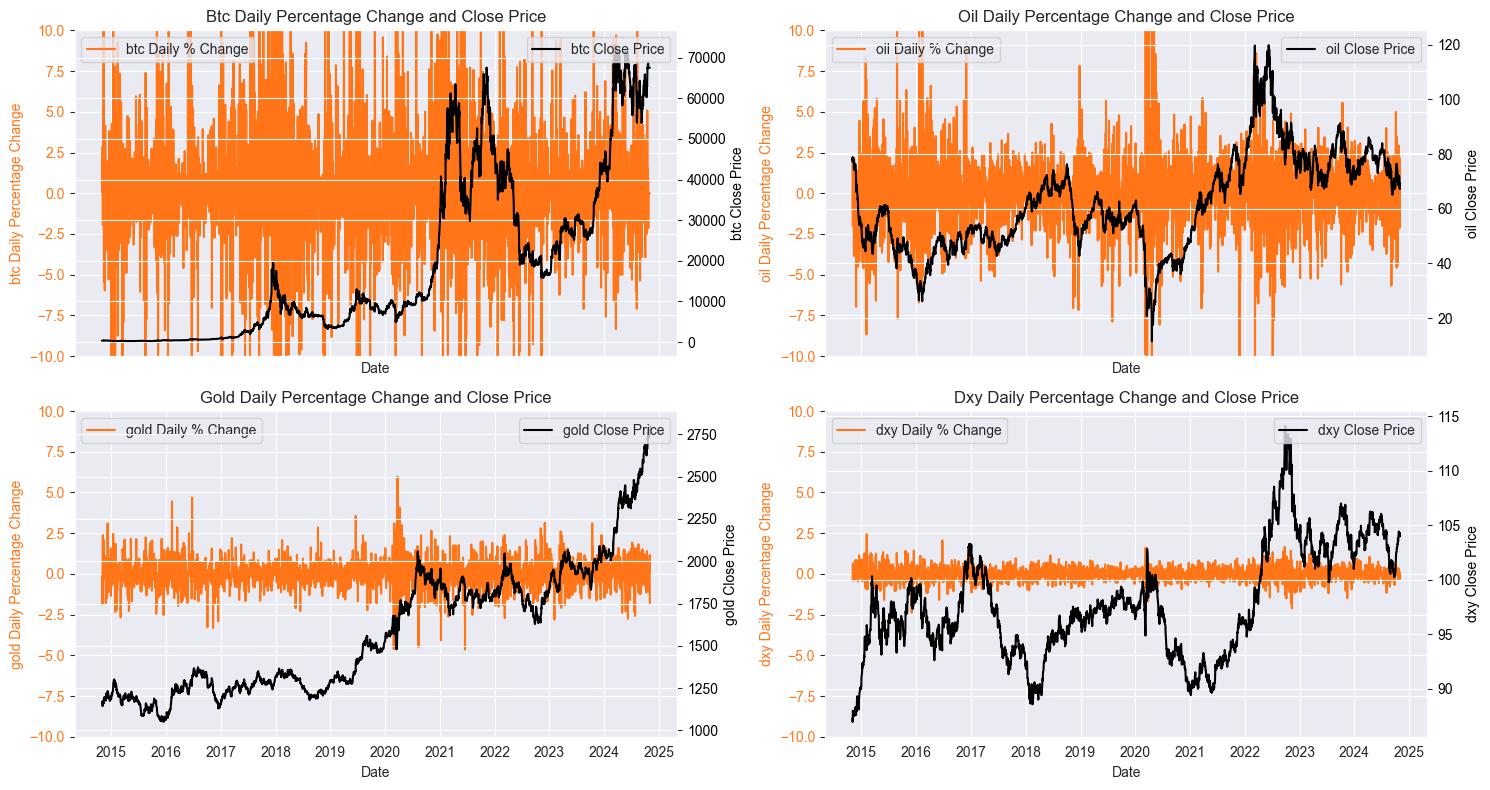

In [90]:
# Assuming 'df' is your DataFrame and it contains the columns for each asset's daily percentage change and close price
assets = ['btc', 'oil', 'gold', 'dxy']  # Example assets
fig, axs = plt.subplots(2, 2, figsize=(15, 8), sharex=True)  # Creating a 2x2 subplot grid

# Flattening the array of axes for easy indexing
axs = axs.flatten()



for i, asset in enumerate(assets):
    # Create twin axis for two different y-axis scales
    ax1 = axs[i]
    ax2 = ax1.twinx()

    # Plotting the daily percentage on the first y-axis
    ax1.plot(df.index, df[f'{asset}_daily_percentage'], color='#FF7518', label=f'{asset} Daily % Change')  # deep blue
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'{asset} Daily Percentage Change', color='#FF7518')
    ax1.tick_params(axis='y', labelcolor='#FF7518')
    ax1.legend(loc='upper left')
    ax1.set_ylim(-10, 10)  # Fixing the y-axis range for percentage

    # Plotting the close price on the second y-axis
    ax2.plot(df.index, df[f'{asset}_close'], color='black', label=f'{asset} Close Price')  # orange
    ax2.set_ylabel(f'{asset} Close Price', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    ax2.legend(loc='upper right')

    ax1.set_title(f'{asset.capitalize()} Daily Percentage Change and Close Price')

# Ensure the subplots do not overlap and everything is visible
fig.tight_layout()

plt.show()


In [91]:
df['gold_daily_percentage'].head(10)

Date
2014-11-01         NaN
2014-11-02         NaN
2014-11-03         NaN
2014-11-04   -0.179518
2014-11-05   -1.884046
2014-11-06   -0.270577
2014-11-07    2.380536
2014-11-08   -0.284949
2014-11-09   -0.285763
2014-11-10   -0.286582
Name: gold_daily_percentage, dtype: float64

#### **Creating volatility on different windows**
- {asset}_rolling_volatility_7
- {asset}_rolling_volatility_30

In [92]:
# Calculate rolling volatilities
for asset in assets:
    df[f'{asset}_rolling_volatility_7'] = df[f'{asset}_daily_percentage'].rolling(window=7).std()
    df[f'{asset}_rolling_volatility_30'] = df[f'{asset}_daily_percentage'].rolling(window=30).std()

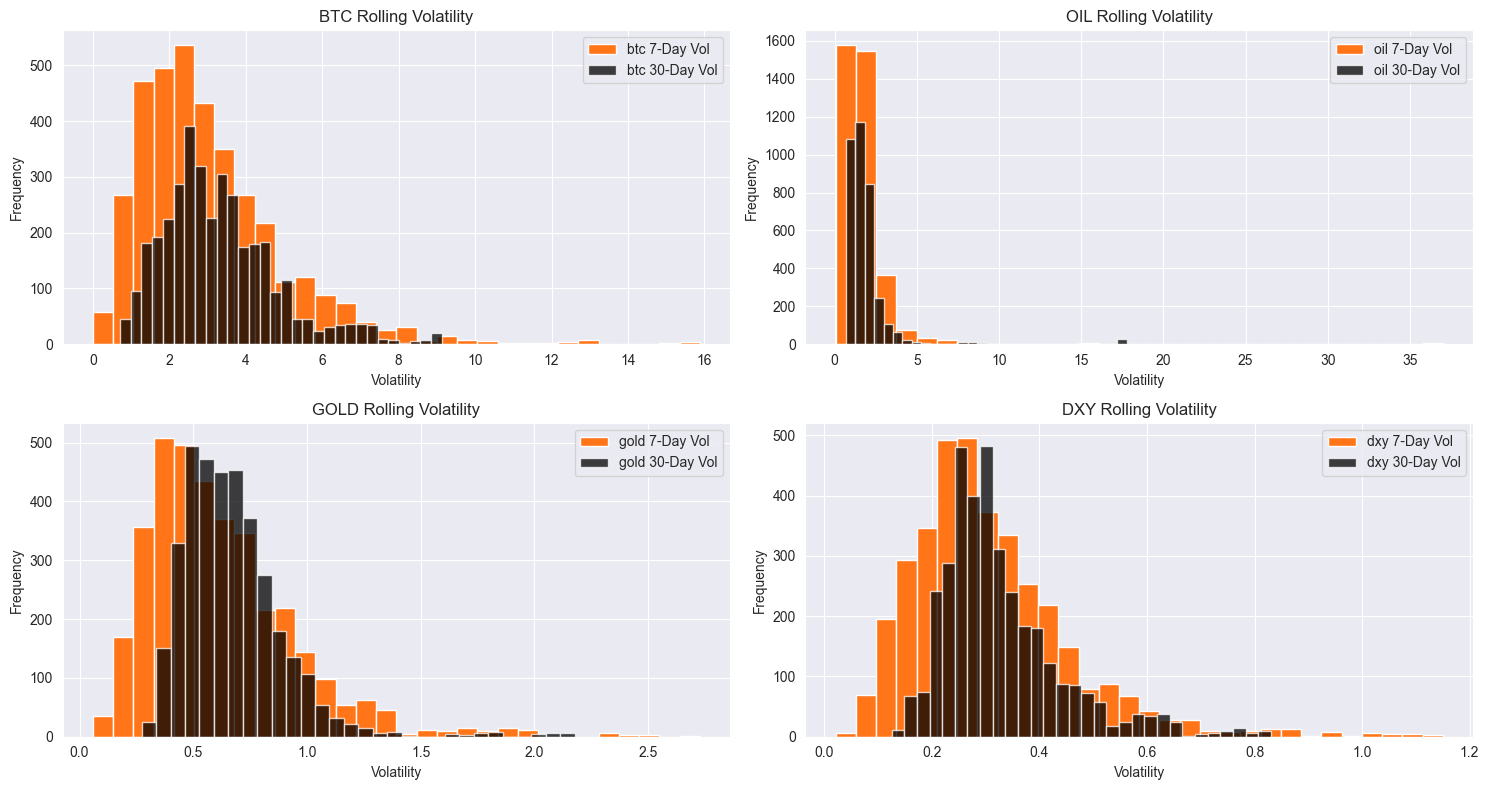

In [93]:
assets = ['btc', 'oil', 'gold', 'dxy']


# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(15, 8))#, sharex=True, sharey=True)
axs = axs.flatten()  # Flatten the array for easier iteration

# Loop through each asset to create histograms for 7-day and 30-day volatilities
for i, asset in enumerate(assets):
    # Plot 7-day rolling volatility histogram
    axs[i].hist(df[f'{asset}_rolling_volatility_7'], bins=30, alpha=1, label=f'{asset} 7-Day Vol', color='#FF7518')
    # Plot 30-day rolling volatility histogram
    axs[i].hist(df[f'{asset}_rolling_volatility_30'], bins=30, alpha=0.75, label=f'{asset} 30-Day Vol', color='black')
    axs[i].set_title(f'{asset.upper()} Rolling Volatility')
    axs[i].legend()
    axs[i].set_xlabel('Volatility')
    axs[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
fig.tight_layout()
plt.show()

#### **Interaction Terms**
- **Ratios**
    - gold_oil_ratio
    - gold_btc_ratio
    - oil_btc_ratio
- **Percentage Difference**
    - dxy_gold
    - dxy_oil
    - dxy_btc



In [94]:
df['gold_oil_ratio'] = df['gold_close'] / df['oil_close']
df['gold_btc_ratio'] = df['gold_close'] / df['btc_close']
df['oil_btc_ratio'] = df['oil_close'] / df['btc_close']


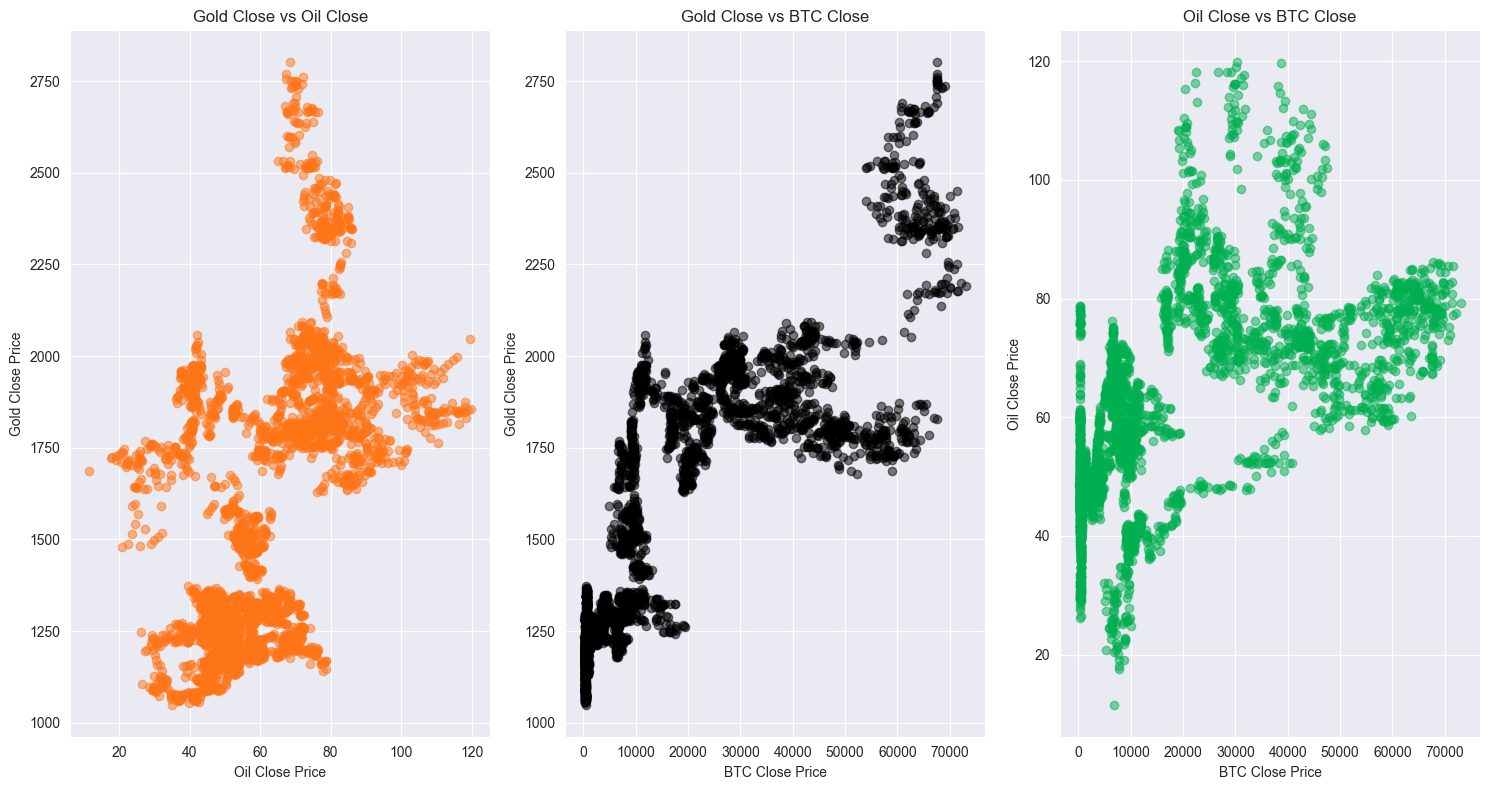

In [95]:
# Create a 3x1 subplot layout
fig, axs = plt.subplots(1, 3, figsize=(15, 8))

# Scatter plot for gold vs oil
axs[0].scatter(df['oil_close'], df['gold_close'], color='#FF7518', alpha=0.5)
axs[0].set_xlabel('Oil Close Price')
axs[0].set_ylabel('Gold Close Price')
axs[0].set_title('Gold Close vs Oil Close')

# Scatter plot for gold vs btc
axs[1].scatter(df['btc_close'], df['gold_close'], color='black', alpha=0.5)
axs[1].set_xlabel('BTC Close Price')
axs[1].set_ylabel('Gold Close Price')
axs[1].set_title('Gold Close vs BTC Close')

# Scatter plot for oil vs btc
axs[2].scatter(df['btc_close'], df['oil_close'], color='#00b050', alpha=0.5)
axs[2].set_xlabel('BTC Close Price')
axs[2].set_ylabel('Oil Close Price')
axs[2].set_title('Oil Close vs BTC Close')

# Adjust layout to prevent overlap
fig.tight_layout()
plt.show()


In [96]:
df['dxy_gold_pct_diff'] = df['dxy_daily_percentage'] - df['gold_daily_percentage']
df['dxy_oil_pct_diff'] = df['dxy_daily_percentage'] - df['oil_daily_percentage']
df['dxy_btc_pct_diff'] = df['dxy_daily_percentage'] - df['btc_daily_percentage']

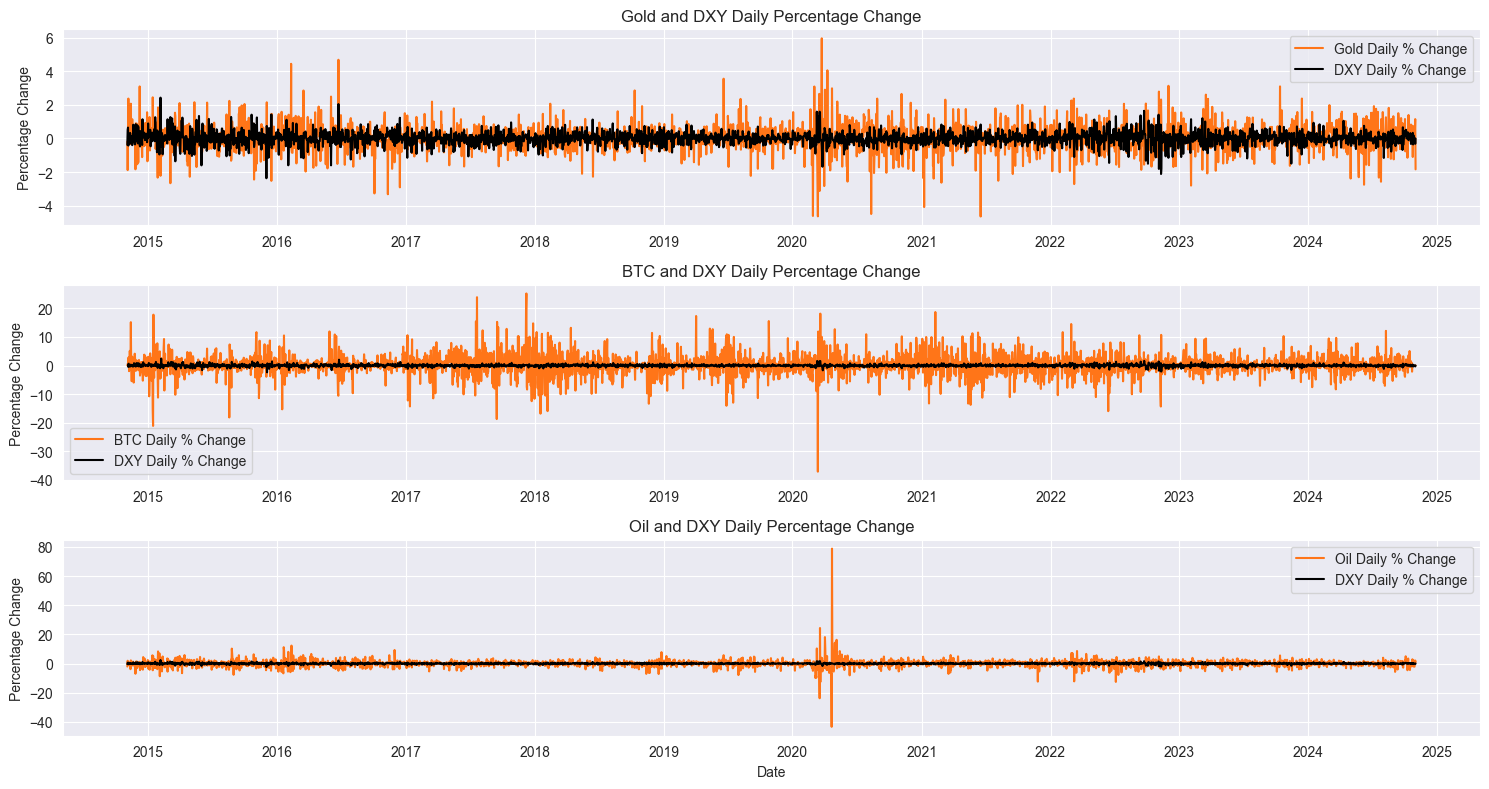

In [97]:
# Assuming df is your DataFrame and it includes columns like 'gold_daily_percentage', 'btc_daily_percentage',
# 'oil_daily_percentage', and 'dxy_daily_percentage'

# Create a 3x1 subplot layout
fig, axs = plt.subplots(3, 1, figsize=(15, 8))

# Gold vs DXY daily percentage
axs[0].plot(df.index, df['gold_daily_percentage'], label='Gold Daily % Change', color='#FF7518')
axs[0].plot(df.index, df['dxy_daily_percentage'], label='DXY Daily % Change', color='black')
axs[0].set_ylabel('Percentage Change')
axs[0].set_title('Gold and DXY Daily Percentage Change')
axs[0].legend()

# BTC vs DXY daily percentage
axs[1].plot(df.index, df['btc_daily_percentage'], label='BTC Daily % Change', color='#FF7518')
axs[1].plot(df.index, df['dxy_daily_percentage'], label='DXY Daily % Change', color='black')
axs[1].set_ylabel('Percentage Change')
axs[1].set_title('BTC and DXY Daily Percentage Change')
axs[1].legend()

# Oil vs DXY daily percentage
axs[2].plot(df.index, df['oil_daily_percentage'], label='Oil Daily % Change', color='#FF7518')
axs[2].plot(df.index, df['dxy_daily_percentage'], label='DXY Daily % Change', color='black')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Percentage Change')
axs[2].set_title('Oil and DXY Daily Percentage Change')
axs[2].legend()


# Adjust layout
fig.tight_layout()
plt.show()


#### **lagged features**

In [98]:
# Calculate yesterday's ocpercentage for each asset
for asset in assets:
    df[f'{asset}_yesterday_Daily_ocpercentage'] = df[f'{asset}_Daily_ocpercentage'].shift(1)

# Calculate yesterday's intraday volatility for each asset
for asset in assets:
    df[f'{asset}_yesterday_intraday_volatility'] = df[f'{asset}_intraday_volatility'].shift(1)

# Calculate yesterday's daily percentage change for each asset
for asset in assets:
    df[f'{asset}_yesterday_daily_percentage'] = df[f'{asset}_daily_percentage'].shift(1)

# Calculate yesterday's percent change of weekly and monthly rolling averages for each asset
for asset in assets:
    df[f'{asset}_yesterday_weekly_avg_pct_change'] = df[f'{asset}_weekly_avg_pct_change'].shift(1)
    df[f'{asset}_yesterday_monthly_avg_pct_change'] = df[f'{asset}_monthly_avg_pct_change'].shift(1)

In [99]:
df.columns

Index(['DoW', 'Month', 'Year', 'btc_open', 'btc_high', 'btc_low', 'btc_close',
       'oil_open', 'oil_high', 'oil_low', 'oil_close', 'gold_open',
       'gold_high', 'gold_low', 'gold_close', 'dxy_open', 'dxy_high',
       'dxy_low', 'dxy_close', 'is_holiday', 'is_weekday', 'btc_weekly_avg',
       'btc_monthly_avg', 'oil_weekly_avg', 'oil_monthly_avg',
       'gold_weekly_avg', 'gold_monthly_avg', 'dxy_weekly_avg',
       'dxy_monthly_avg', 'btc_weekly_avg_pct_change',
       'btc_monthly_avg_pct_change', 'oil_weekly_avg_pct_change',
       'oil_monthly_avg_pct_change', 'gold_weekly_avg_pct_change',
       'gold_monthly_avg_pct_change', 'dxy_weekly_avg_pct_change',
       'dxy_monthly_avg_pct_change', 'btc_Daily_ocpercentage',
       'btc_Daily_max_percentage', 'btc_Daily_min_percentage',
       'oil_Daily_ocpercentage', 'oil_Daily_max_percentage',
       'oil_Daily_min_percentage', 'gold_Daily_ocpercentage',
       'gold_Daily_max_percentage', 'gold_Daily_min_percentage',
       'dx

### **`Data Preparation`**

#### **Preprocessing data for Modeling**

In [100]:
df.head()

DoW  Month  Year  btc_open  btc_high  btc_low  btc_close  \
Date                                                                         
2014-11-01   Saturday     11  2014    338.65    340.53   321.05     325.75   
2014-11-02     Sunday     11  2014    326.08    329.05   320.63     325.89   
2014-11-03     Monday     11  2014    325.57    334.00   325.48     327.55   
2014-11-04    Tuesday     11  2014    327.16    331.77   325.08     330.49   
2014-11-05  Wednesday     11  2014    330.68    343.37   330.68     339.49   

            oil_open  oil_high  oil_low  oil_close  gold_open  gold_high  \
Date                                                                       
2014-11-01       NaN       NaN      NaN        NaN        NaN        NaN   
2014-11-02       NaN       NaN      NaN        NaN        NaN        NaN   
2014-11-03     80.59     80.98    78.08      78.78     1171.1     1173.4   
2014-11-04     78.22     78.41    75.84      77.19     1164.6     1175.0   
2014-11-05     77.36     79.35    76.46      78.68     1168.4     1169.3   

            gold_low  gold_close  dxy_open  dxy_high  dxy_low  dxy_close  \
Date                                                                       
2014-11-01       NaN         NaN       NaN       NaN      NaN        NaN   
2014-11-02       NaN         NaN       NaN       NaN      NaN        NaN   
2014-11-03    1161.0      1169.8     87.08     87.41    87.02      87.31   
2014-11-04    1163.4      1167.7     87.25     87.30    86.88      86.98   
2014-11-05    1137.1      1145.7     87.01     87.61    86.94      87.44   

            is_holiday  is_weekday  btc_weekly_avg  btc_monthly_avg  \
Date                                                                  
2014-11-01           0           0      325.750000       325.750000   
2014-11-02           0           0      325.820000       325.820000   
2014-11-03           0           1      326.396667       326.396667   
2014-11-04           0           1      327.420000       327.420000   
2014-11-05           0           1      329.834000       329.834000   

            oil_weekly_avg  oil_monthly_avg  gold_weekly_avg  \
Date                                                           
2014-11-01             NaN              NaN              NaN   
2014-11-02             NaN              NaN              NaN   
2014-11-03       78.780000        78.780000      1169.800000   
2014-11-04       77.985000        77.985000      1168.750000   
2014-11-05       78.216667        78.216667      1161.066667   

            gold_monthly_avg  dxy_weekly_avg  dxy_monthly_avg  \
Date                                                            
2014-11-01               NaN             NaN              NaN   
2014-11-02               NaN             NaN              NaN   
2014-11-03       1169.800000       87.310000        87.310000   
2014-11-04       1168.750000       87.145000        87.145000   
2014-11-05       1161.066667       87.243333        87.243333   

            btc_weekly_avg_pct_change  btc_monthly_avg_pct_change  \
Date                                                                
2014-11-01                        NaN                         NaN   
2014-11-02                   0.021489                    0.021489   
2014-11-03                   0.176989                    0.176989   
2014-11-04                   0.313524                    0.313524   
2014-11-05                   0.737279                    0.737279   

            oil_weekly_avg_pct_change  oil_monthly_avg_pct_change  \
Date                                                                
2014-11-01                        NaN                         NaN   
2014-11-02                        NaN                         NaN   
2014-11-03                        NaN                         NaN   
2014-11-04                  -1.009139                   -1.009139   
2014-11-05                   0.297066                    0.297066   

            gold_weekly_avg_pct_ch

In [101]:
df.tail()

DoW  Month  Year  btc_open  btc_high   btc_low  btc_close  \
Date                                                                          
2024-10-27     Sunday     10  2024  69009.37   69408.1  66873.84   67525.97   
2024-10-28     Monday     10  2024  69009.37   69408.1  66873.84   67525.97   
2024-10-29    Tuesday     10  2024  69009.37   69408.1  66873.84   67525.97   
2024-10-30  Wednesday     10  2024  69009.37   69408.1  66873.84   67525.97   
2024-10-31   Thursday     10  2024  69009.37   69408.1  66873.84   67525.97   

            oil_open   oil_high    oil_low  oil_close  gold_open  gold_high  \
Date                                                                          
2024-10-27     69.43  69.973333  67.933333  68.846667     2744.6     2754.6   
2024-10-28     68.98  69.000000  66.920000  67.380000     2749.2     2758.3   
2024-10-29     68.02  68.520000  66.720000  67.210000     2741.9     2773.2   
2024-10-30     67.47  69.170000  67.280000  68.610000     2786.9     2801.8   
2024-10-31     69.10  70.810000  68.300000  69.260000     2799.1     2801.2   

               gold_low   gold_close  dxy_open    dxy_high  dxy_low  \
Date                                                                  
2024-10-27  2730.233333  2751.333333    104.23  104.493333   104.06   
2024-10-28  2736.900000  2755.900000    104.32  104.570000   104.12   
2024-10-29  2741.900000  2768.800000    104.31  104.640000   104.21   
2024-10-30  2782.400000  2800.800000    104.25  104.440000   103.98   
2024-10-31  2741.800000  2749.300000    104.08  104.220000   103.82   

            dxy_close  is_holiday  is_weekday  btc_weekly_avg  \
Date                                                            
2024-10-27     104.30           0           0        67525.97   
2024-10-28     104.32           0           1        67525.97   
2024-10-29     104.32           0           1        67525.97   
2024-10-30     103.99           0           1        67525.97   
2024-10-31     103.98           0           1        67525.97   

            btc_monthly_avg  oil_weekly_avg  oil_monthly_avg  gold_weekly_avg  \
Date                                                                            
2024-10-27     64811.252000       70.575714        71.466333      2745.328571   
2024-10-28     64865.862667       70.195714        71.455556      2747.757143   
2024-10-29     64928.885000       69.498571        71.438000      2749.042857   
2024-10-30     65068.767333       69.190000        71.466000      2759.242857   
2024-10-31     65291.732667       69.057143        71.461667      2759.300000   

            gold_monthly_avg  dxy_weekly_avg  dxy_monthly_avg  \
Date                                                            
2024-10-27       2692.403333      104.202857       102.962000   
2024-10-28       2695.426667      104.247143       103.088889   
2024-10-29       2698.976667      104.281429       103.211333   
2024-10-30       2703.690000      104.218571       103.318333   
2024-10-31       2705.656667      104.207143       103.411333   

            btc_weekly_avg_pct_change  btc_monthly_avg_pct_change  \
Date                                                                
2024-10-27                  -0.311232                    0.089329   
2024-10-28                   0.000000                    0.084261   
2024-10-29                   0.000000                    0.097158   
2024-10-30                   0.000000                    0.215439   
2024-10-31                   0.000000                    0.342661   

            oil_weekly_avg_pct_change  oil_monthly_avg_pct_change  \
Date                                                                
2024-10-27                  -0.150237                    0.054912   
2024-10-28                  -0.538429                   -0.015081   
2024-10-29                  -0.993142                   -0.024568   
2024-10-30                  -0.443997                    0.039195   
2024-10-31                  -0.192

In [102]:
df.isna().sum()

DoW                                       0
Month                                     0
Year                                      0
btc_open                                  0
btc_high                                  0
btc_low                                   0
btc_close                                 0
oil_open                                  2
oil_high                                  2
oil_low                                   2
oil_close                                 2
gold_open                                 2
gold_high                                 2
gold_low                                  2
gold_close                                2
dxy_open                                  2
dxy_high                                  2
dxy_low                                   2
dxy_close                                 2
is_holiday                                0
is_weekday                                0
btc_weekly_avg                            0
btc_monthly_avg                 

In [103]:
df['Movement'] = df['dxy_daily_percentage'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Stable'))

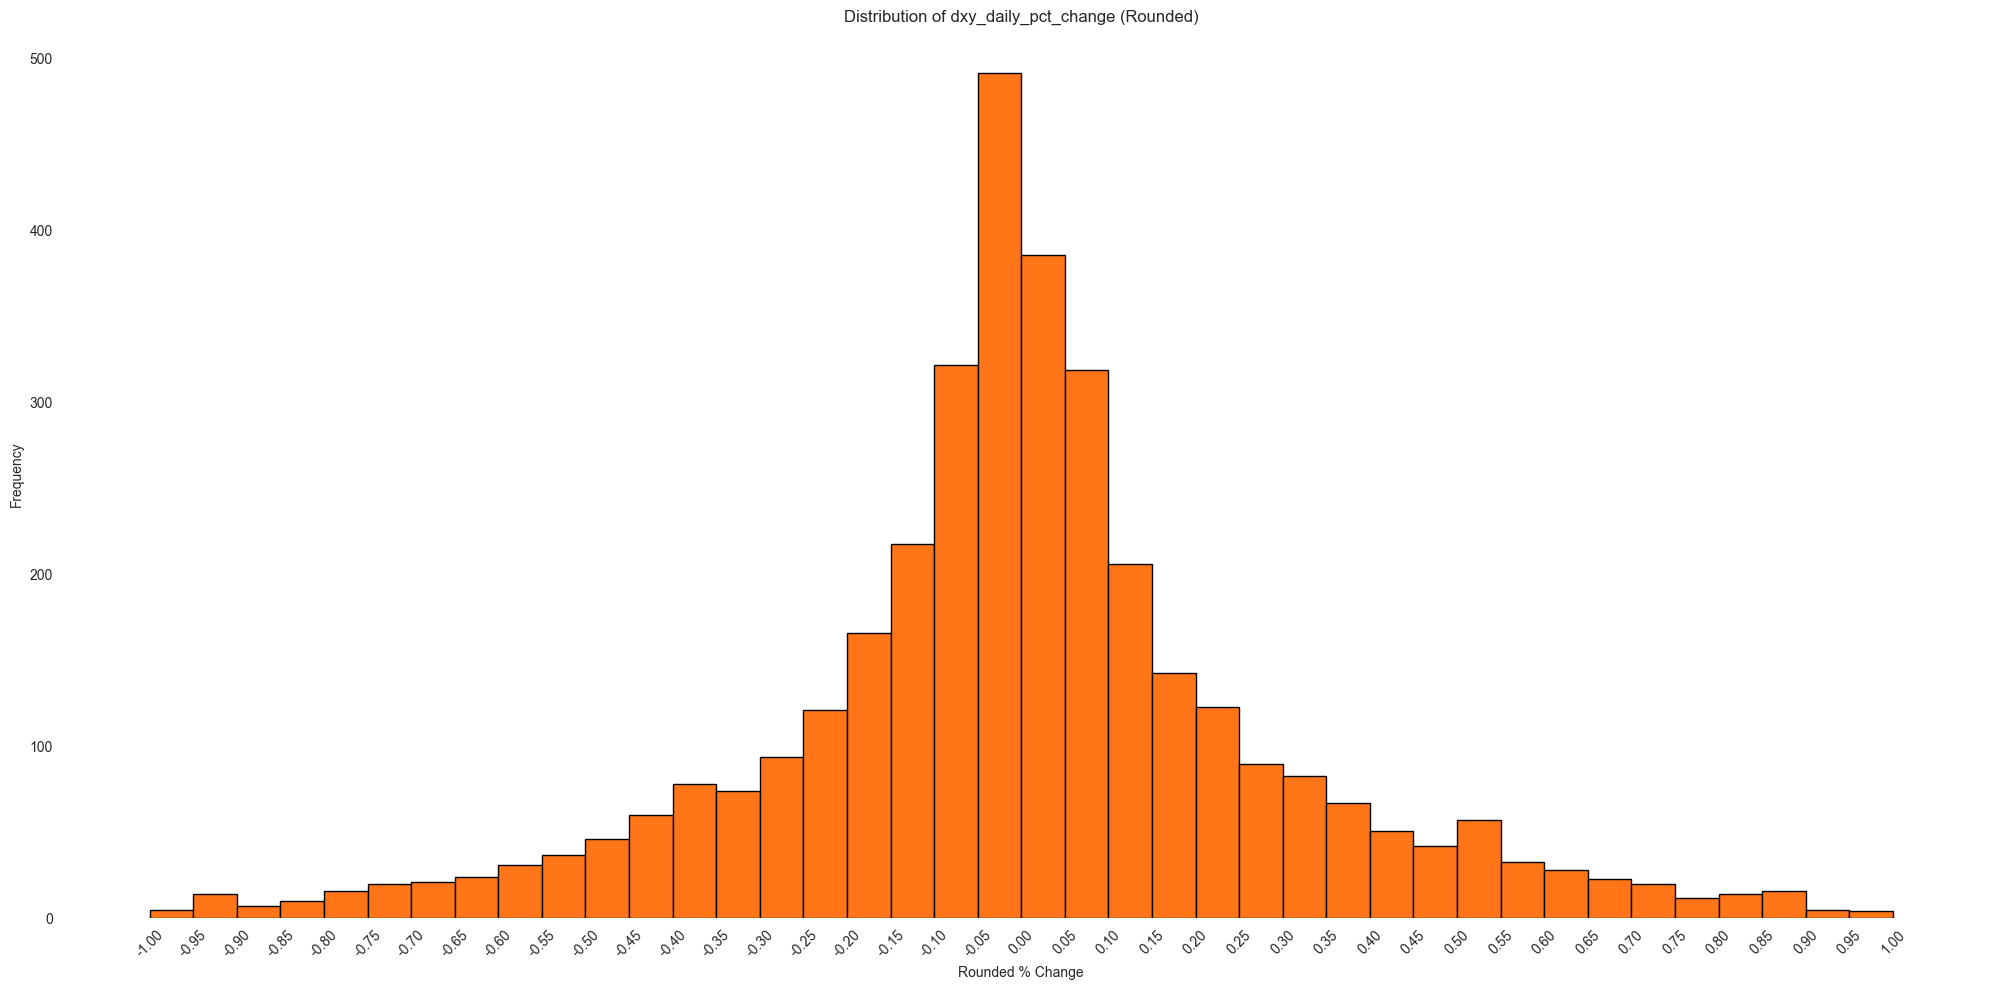

In [104]:
plt.figure(figsize=(20, 10))
# Round the values to two decimal places
df['rounded_pct_change'] = df['dxy_daily_percentage'].round(2)

# Define the bins for intervals (from -1 to 1 with 0.05 intervals)
bins = np.arange(-1, 1.05, 0.05)

# Plot the histogram for visualization
ax = df['rounded_pct_change'].hist(bins=bins, edgecolor='black', color='#FF7518')

# Set the x-ticks every 0.05, starting from -0.05
x_ticks = np.arange(-1, 1.05, 0.05)
ax.set_xticks(x_ticks)

# Set the x-tick labels to show only the numbers without ranges
ax.set_xticklabels([f'{tick:.2f}' for tick in x_ticks], rotation=45)

# Display the plot
plt.xlabel('Rounded % Change')
plt.ylabel('Frequency')
plt.title('Distribution of dxy_daily_pct_change (Rounded)')
ax.set_facecolor('white')
plt.tight_layout()  # Ensures layout is adjusted to avoid clipping
plt.show()

In [105]:
df['Movement'].value_counts()

Movement
Positive    1425
Negative    1385
Stable       843
Name: count, dtype: int64

In [106]:
df.isnull().sum()

DoW                                       0
Month                                     0
Year                                      0
btc_open                                  0
btc_high                                  0
btc_low                                   0
btc_close                                 0
oil_open                                  2
oil_high                                  2
oil_low                                   2
oil_close                                 2
gold_open                                 2
gold_high                                 2
gold_low                                  2
gold_close                                2
dxy_open                                  2
dxy_high                                  2
dxy_low                                   2
dxy_close                                 2
is_holiday                                0
is_weekday                                0
btc_weekly_avg                            0
btc_monthly_avg                 

In [107]:
df = df.dropna()  # Drop rows with null values

In [108]:
df = pd.get_dummies(df, columns=['DoW'], drop_first=False)  # One-hot encode 'DoW' column

In [109]:
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [110]:
df.dtypes

Month                                      int64
Year                                       int64
btc_open                                 float64
btc_high                                 float64
btc_low                                  float64
btc_close                                float64
oil_open                                 float64
oil_high                                 float64
oil_low                                  float64
oil_close                                float64
gold_open                                float64
gold_high                                float64
gold_low                                 float64
gold_close                               float64
dxy_open                                 float64
dxy_high                                 float64
dxy_low                                  float64
dxy_close                                float64
is_holiday                                 int32
is_weekday                                 int32
btc_weekly_avg      

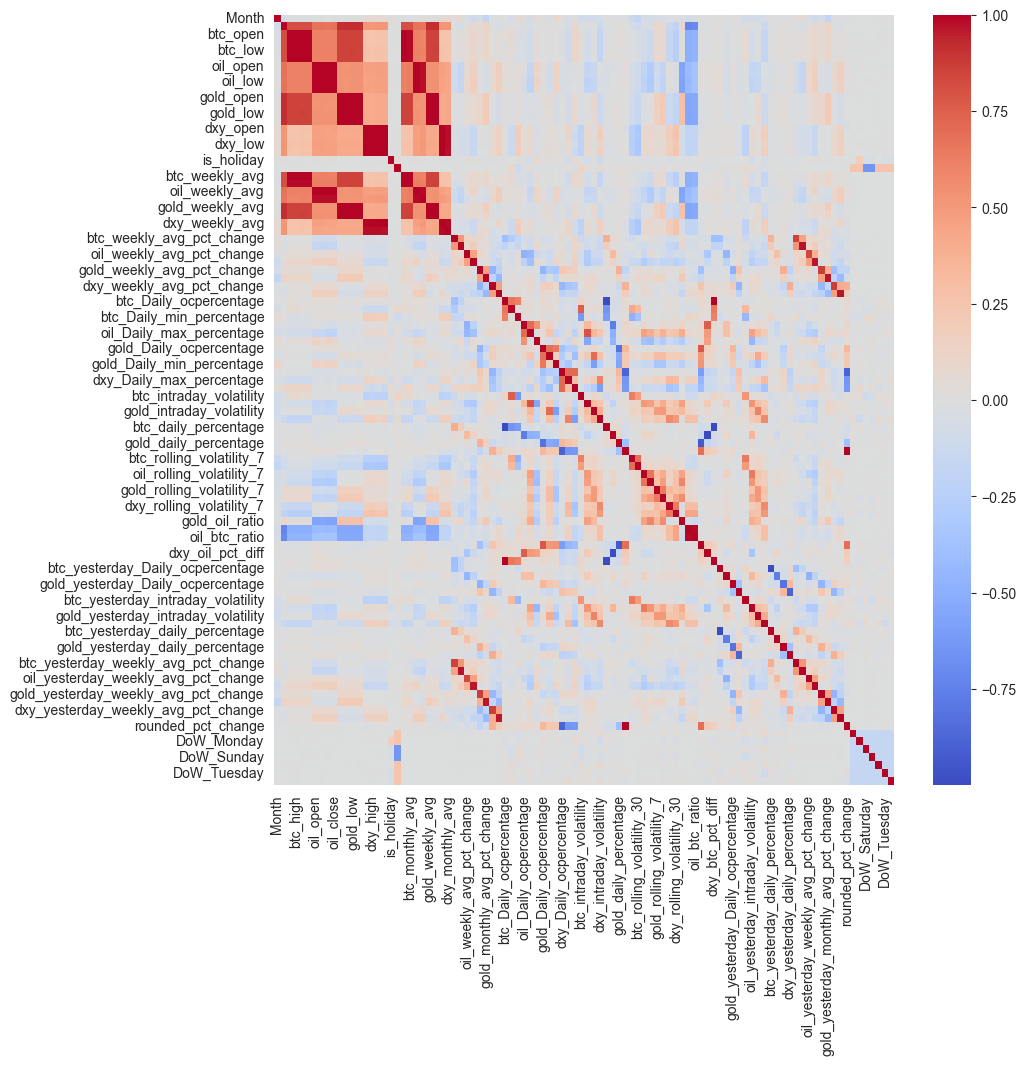

In [111]:
plt.figure(figsize=(10, 10))
corr_matrix = df.drop(columns=['Movement']).corr()

# Plot heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f')
plt.show()

#### **Feature Selection**
- Checking multicollinearity
- Feature Selection Based on minimizing VIF

In [112]:
# Compute VIF for each feature
data = add_constant(df.drop(columns=['Movement']))

vif_data = pd.DataFrame()
vif_data['feature'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

vif_data.sort_values(by='VIF', ascending=False)

feature           VIF
98                          DoW_Wednesday           inf
69                       dxy_oil_pct_diff           inf
93                             DoW_Monday           inf
20                             is_weekday           inf
96                           DoW_Thursday           inf
95                             DoW_Sunday           inf
92                             DoW_Friday           inf
70                       dxy_btc_pct_diff           inf
94                           DoW_Saturday           inf
68                      dxy_gold_pct_diff           inf
56                   dxy_daily_percentage           inf
55                  gold_daily_percentage           inf
54                   oil_daily_percentage           inf
53                   btc_daily_percentage           inf
97                            DoW_Tuesday           inf
17                                dxy_low  3.812128e+05
16                               dxy_high  3.324257e+05
18                              dxy_close  3.164485e+05
15                               dxy_open  2.976895e+05
14                             gold_close  1.109593e+05
13                               gold_low  1.082135e+05
12                              gold_high  1.051284e+05
11                              gold_open  8.417671e+04
52                dxy_intraday_volatility  2.140133e+04
48               dxy_Daily_min_percentage  1.598213e+04
91                     rounded_pct_change  1.588041e+04
47               dxy_Daily_max_percentage  1.446274e+04
9                                 oil_low  7.611845e+03
4                                btc_high  7.348408e+03
10                              oil_close  7.119261e+03
7                                oil_open  7.014860e+03
6                               btc_close  6.568828e+03
8                                oil_high  6.561610e+03
25                        gold_weekly_avg  5.674910e+03
3                                btc_open  5.519551e+03
5                                 btc_low  4.658072e+03
51               gold_intraday_volatility  3.091294e+03
44              gold_Daily_max_percentage  1.891278e+03
46                 dxy_Daily_ocpercentage  1.890477e+03
45              gold_Daily_min_percentage  1.727704e+03
27                         dxy_weekly_avg  1.263787e+03
21                         btc_weekly_avg  1.157910e+03
26                       gold_monthly_avg  1.001894e+03
23                         oil_weekly_avg  7.418814e+02
37                 btc_Daily_ocpercentage  2.907280e+02
71       btc_yesterday_Daily_ocpercentage  2.769519e+02
79         btc_yesterday_daily_percentage  2.760125e+02
28                        dxy_monthly_avg  2.307428e+02
22                        btc_monthly_avg  1.642569e+02
24                        oil_monthly_avg  1.602283e+02
49                btc_intraday_volatility  1.140631e+02
43                gold_Daily_ocpercentage  1.129411e+02
39               btc_Daily_min_percentage  6.849251e+01
38               btc_Daily_max_percentage  6.036829e+01
40                 oil_Daily_ocpercentage  5.729080e+01
66                         gold_btc_ratio  5.595767e+01
42               oil_Daily_min_percentage  5.447924e+01
67                          oil_btc_ratio  4.727459e+01
41               oil_Daily_max_percentage  4.467720e+01
34            gold_monthly_avg_pct_change  4.204826e+01
36             dxy_monthly_avg_pct_change  3.998053e+01
2                                    Year  3.785759e+01
30             btc_monthly_avg_pct_change  3.754846e+01
88  gold_yesterday_monthly_avg_pct_change  3.711816e+01
84   btc_yesterday_monthly_avg_pct_change  3.537667e+01
50                oil_intraday_volatility  3.533362e+01
90   dxy_yesterday_monthly_avg_pct_change  3.483563e+01
32             oil_monthly_avg_pct_change  3.214655e+01
86   oil_yesterday_monthly_avg_pct_change  2.938793e+01
65                         gold_oil_ratio  2.700333e+01
35              dxy_weekly_avg_pct_change  1.493848e+01
33

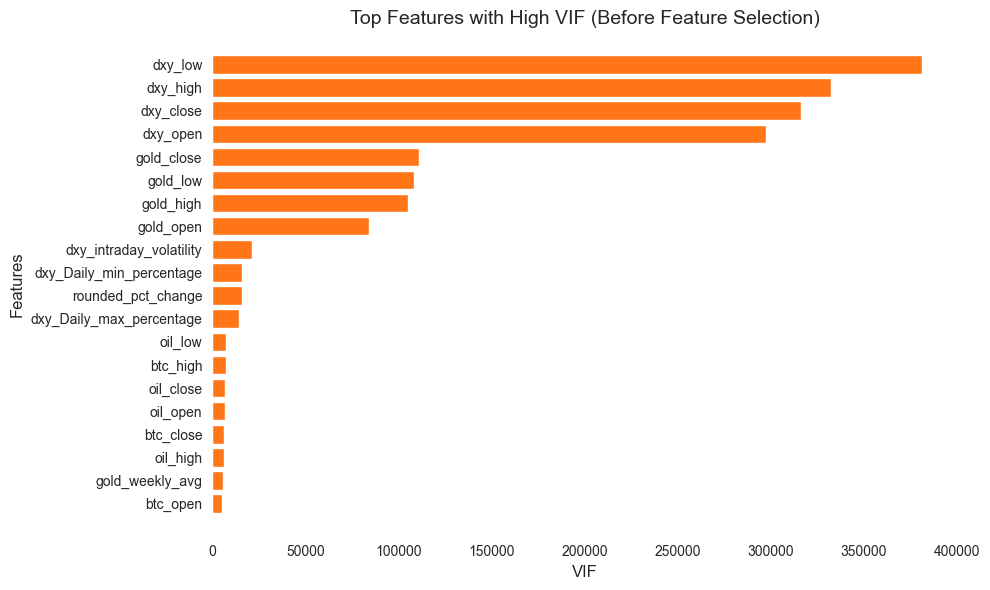

In [113]:
# Sort VIF data for better visualization
finite_vif = vif_data[vif_data['VIF'] < float('inf')].sort_values(by='VIF', ascending=False).head(20)

# Set up a figure with a completely white background
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white') 

# Ensures the figure background is white
ax.barh(finite_vif['feature'], finite_vif['VIF'], color='#FF7518')
ax.set_xlabel("VIF", fontsize=12)
ax.set_ylabel("Features", fontsize=12)
ax.set_title("Top Features with High VIF (Before Feature Selection)", fontsize=14)
ax.invert_yaxis()  # Invert y-axis for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)  # Optional grid for clarity
ax.set_facecolor('white')  # Force white background for the axes

# Save and show the chart
plt.tight_layout()
plt.savefig("vif_bar_chart_white_background.png", dpi=300, facecolor='white', bbox_inches='tight')  # Save as an image
plt.show()

In [114]:
# Display infinite VIF values separately
vif_data[vif_data['VIF'] == float('inf')]

feature  VIF
20             is_weekday  inf
53   btc_daily_percentage  inf
54   oil_daily_percentage  inf
55  gold_daily_percentage  inf
56   dxy_daily_percentage  inf
68      dxy_gold_pct_diff  inf
69       dxy_oil_pct_diff  inf
70       dxy_btc_pct_diff  inf
92             DoW_Friday  inf
93             DoW_Monday  inf
94           DoW_Saturday  inf
95             DoW_Sunday  inf
96           DoW_Thursday  inf
97            DoW_Tuesday  inf
98          DoW_Wednesday  inf

- Removing all Price columns (original columns)
- Removing All DXY related columns. (Movement is the target variable)
- Removing moving averages (keeping percentage  changes)

In [115]:
df_final = df[['Month', 'Year',
                'dxy_open',                                        
                'is_holiday', 
                'btc_intraday_volatility', 'oil_intraday_volatility', 'gold_intraday_volatility',       
                'btc_daily_percentage', 'oil_daily_percentage', 'gold_daily_percentage',                
                'btc_rolling_volatility_7', 'btc_rolling_volatility_30',                             
                'oil_rolling_volatility_7', 'oil_rolling_volatility_30',                             
                'gold_rolling_volatility_7', 'gold_rolling_volatility_30',                             
                'btc_yesterday_intraday_volatility', 'oil_yesterday_intraday_volatility','gold_yesterday_intraday_volatility',    
                'btc_yesterday_daily_percentage', 'oil_yesterday_daily_percentage', 'gold_yesterday_daily_percentage', 
                'btc_yesterday_weekly_avg_pct_change', 'btc_yesterday_monthly_avg_pct_change',      
                'oil_yesterday_weekly_avg_pct_change', 'oil_yesterday_monthly_avg_pct_change',        
                'gold_yesterday_weekly_avg_pct_change','gold_yesterday_monthly_avg_pct_change',         
                'Movement',                                                                           
                 ]]

In [117]:
df_final.tail()

Month  Year  dxy_open  is_holiday  btc_intraday_volatility  \
Date                                                                     
2024-10-27     10  2024    104.23           0                 3.753015   
2024-10-28     10  2024    104.32           0                 3.753015   
2024-10-29     10  2024    104.31           0                 3.753015   
2024-10-30     10  2024    104.25           0                 3.753015   
2024-10-31     10  2024    104.08           0                 3.753015   

            oil_intraday_volatility  gold_intraday_volatility  \
Date                                                            
2024-10-27                 2.963106                  0.885631   
2024-10-28                 3.086969                  0.776516   
2024-10-29                 2.678173                  1.130454   
2024-10-30                 2.754700                  0.692659   
2024-10-31                 3.624025                  2.160550   

            btc_daily_percentage  oil_daily_percentage  gold_daily_percentage  \
Date                                                                            
2024-10-27                   0.0             -2.085901               0.166256   
2024-10-28                   0.0             -2.130338               0.165980   
2024-10-29                   0.0             -0.252300               0.468087   
2024-10-30                   0.0              2.083023               1.155735   
2024-10-31                   0.0              0.947384              -1.838760   

            btc_rolling_volatility_7  btc_rolling_volatility_30  \
Date                                                              
2024-10-27                  0.808347                   1.786862   
2024-10-28                  0.000000                   1.786936   
2024-10-29                  0.000000                   1.784753   
2024-10-30                  0.000000                   1.648916   
2024-10-31                  0.000000                   1.450973   

            oil_rolling_volatility_7  oil_rolling_volatility_30  \
Date                                                              
2024-10-27                  2.103183                   2.049756   
2024-10-28                  2.191355                   2.089053   
2024-10-29                  1.606657                   2.089559   
2024-10-30                  1.914805                   2.124083   
2024-10-31                  1.969971                   2.085546   

            gold_rolling_volatility_7  gold_rolling_volatility_30  \
Date                                                                
2024-10-27                   0.630561                    0.576807   
2024-10-28                   0.631339                    0.575492   
2024-10-29                   0.587239                    0.577452   
2024-10-30                   0.455859                    0.604741   
2024-10-31                   0.919961                    0.679358   

            btc_yesterday_intraday_volatility  \
Date                                            
2024-10-27                           3.753015   
2024-10-28                           3.753015   
2024-10-29                           3.753015   
2024-10-30                           3.753015   
2024-10-31                           3.753015   

            oil_yesterday_intraday_volatility  \
Date                                            
2024-10-27                           2.844411   
2024-10-28                           2.963106   
2024-10-29                           3.086969   
2024-10-30                           2.678173   
2024-10-31                           2.754700   

            gold_yesterday_intraday_volatility  \
Date                                             
2024-10-27                            0.995109   
2024-10-28                            0.885631   
2024-10-29                            0.776516   
2024-10-30                            1.130454   
2024-10-31                            0.692659   

      

In [ ]:
# Compute VIF for each feature
data = add_constant(df_final.drop(columns=['Movement']))

vif_data = pd.DataFrame()
vif_data['feature'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

vif_data.sort_values(by='VIF', ascending=False)

feature            VIF
0                                   const  744564.798244
11               btc_rolling_volatility_7       3.014559
18      oil_yesterday_intraday_volatility       2.900857
13               oil_rolling_volatility_7       2.607380
14              oil_rolling_volatility_30       2.464920
16             gold_rolling_volatility_30       2.392824
12              btc_rolling_volatility_30       2.262455
6                 oil_intraday_volatility       2.097660
15              gold_rolling_volatility_7       1.902388
17      btc_yesterday_intraday_volatility       1.898433
19     gold_yesterday_intraday_volatility       1.868588
5                 btc_intraday_volatility       1.845437
7                gold_intraday_volatility       1.837112
3                                dxy_open       1.720232
25    oil_yesterday_weekly_avg_pct_change       1.684977
23    btc_yesterday_weekly_avg_pct_change       1.656080
9                    oil_daily_percentage       1.577884
26   oil_yesterday_monthly_avg_pct_change       1.559263
2                                    Year       1.550795
27   gold_yesterday_weekly_avg_pct_change       1.504044
24   btc_yesterday_monthly_avg_pct_change       1.498126
28  gold_yesterday_monthly_avg_pct_change       1.368724
21         oil_yesterday_daily_percentage       1.257150
20         btc_yesterday_daily_percentage       1.229867
22        gold_yesterday_daily_percentage       1.200983
1                                   Month       1.115311
8                    btc_daily_percentage       1.049978
10                  gold_daily_percentage       1.030070
4                              is_holiday       1.021008

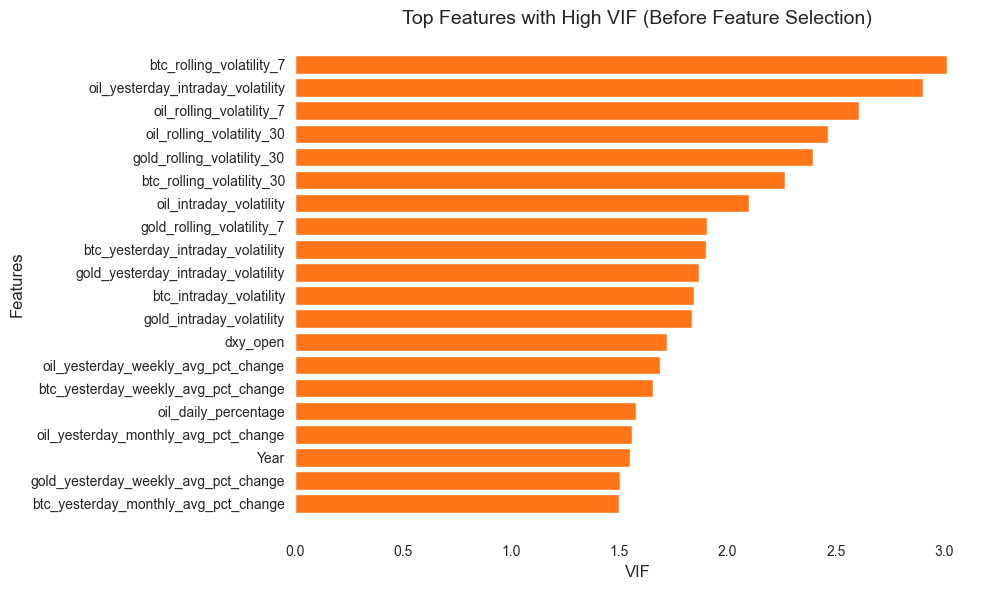

In [ ]:
vif_data= vif_data[vif_data['feature']!='const']

# Sort VIF data for better visualization
finite_vif = vif_data[vif_data['VIF'] < float('inf')].sort_values(by='VIF', ascending=False).head(20)

# Set up a figure with a completely white background
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white') 

# Ensures the figure background is white
ax.barh(finite_vif['feature'], finite_vif['VIF'], color='#FF7518')
ax.set_xlabel("VIF", fontsize=12)
ax.set_ylabel("Features", fontsize=12)
ax.set_title("Top Features with High VIF (Before Feature Selection)", fontsize=14)
ax.invert_yaxis()  # Invert y-axis for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)  # Optional grid for clarity
ax.set_facecolor('white')  # Force white background for the axes

# Save and show the chart
plt.tight_layout()
plt.savefig("vif_bar_chart_white_background.png", dpi=300, facecolor='white', bbox_inches='tight')  # Save as an image
plt.show()

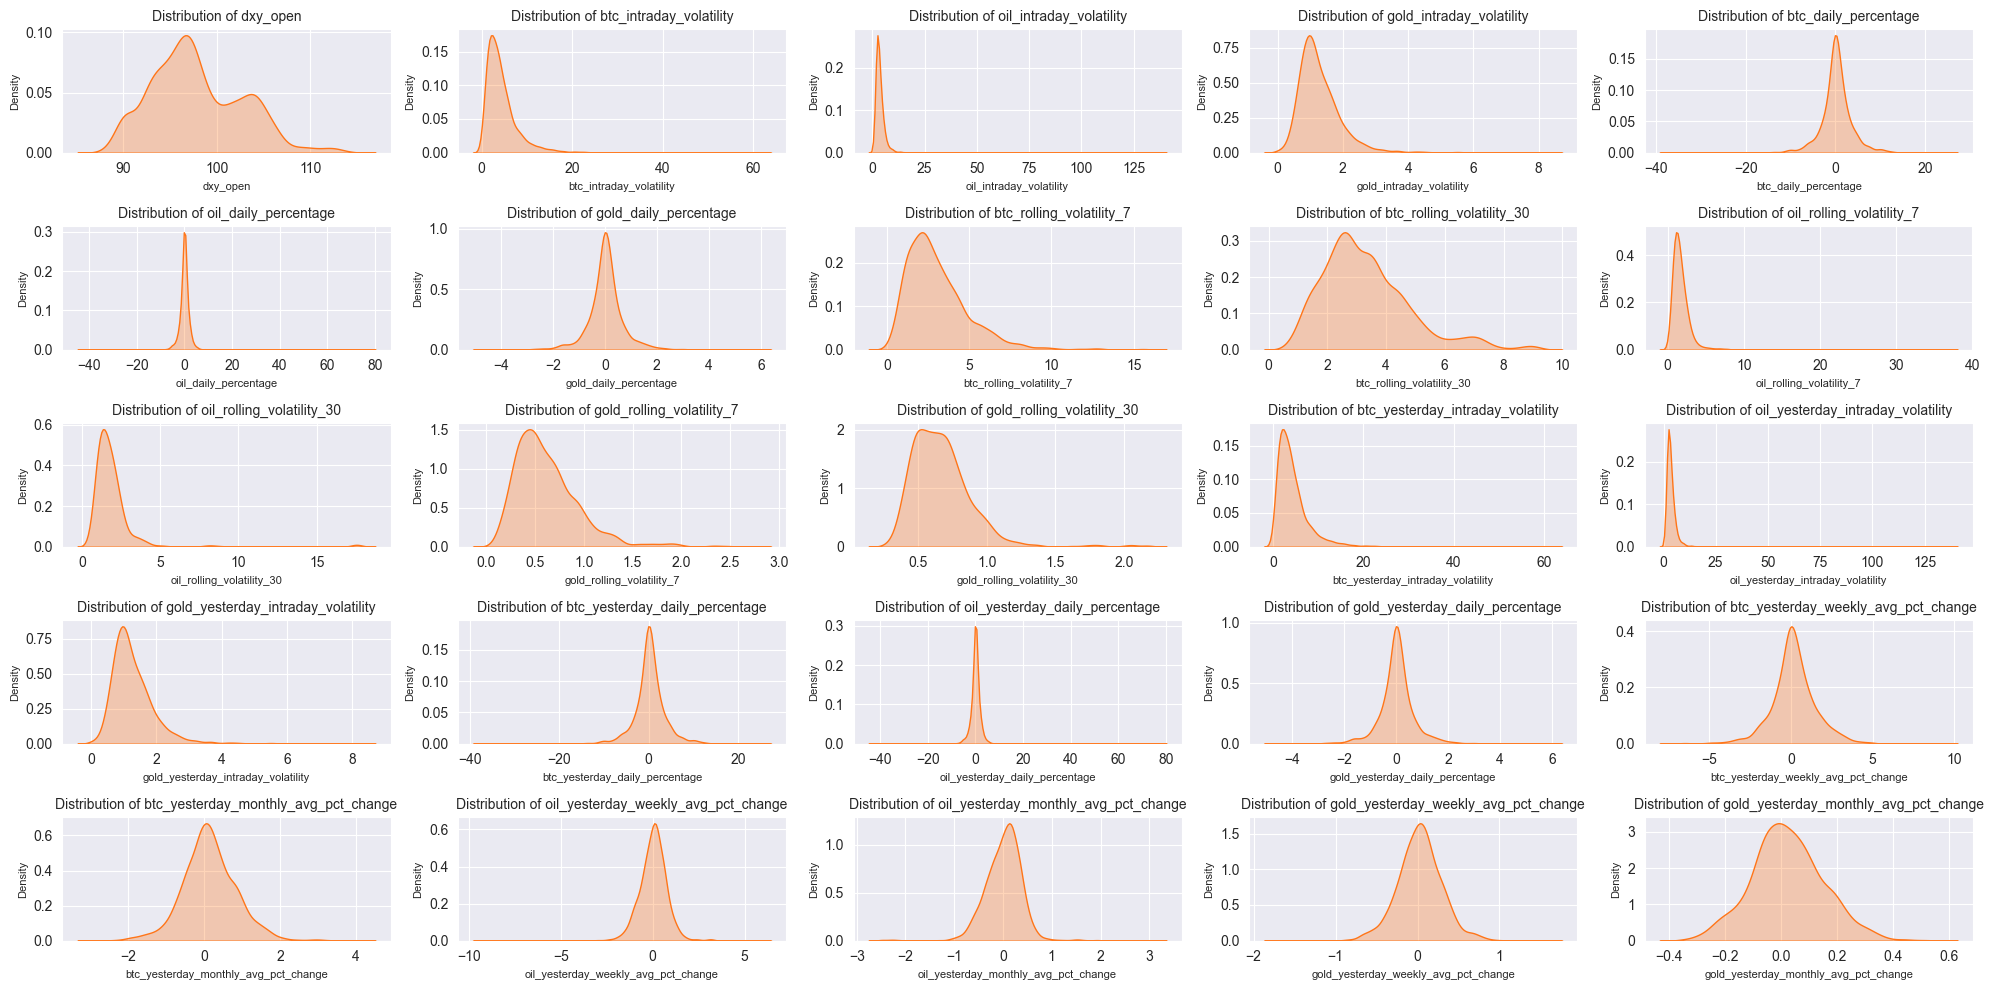

In [ ]:
# Remove irrelevant columns
columns_to_plot = df_final.drop(columns=['Movement', 'Month', 'Year', 'is_holiday']).columns

# Set up the grid layout
n_cols = 5  # Number of plots per row
n_rows = math.ceil(len(columns_to_plot) / n_cols)  # Calculate the required rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 2))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each column using KDE
for i, column in enumerate(columns_to_plot):
    sns.kdeplot(df_final[column], fill=True, alpha=0.3, color='#FF7518', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=10)
    axes[i].set_xlabel(column, fontsize=8)
    axes[i].set_ylabel('Density', fontsize=8)

# Hide unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

#### **Splitting data into X and y**

In [ ]:
# Divide data into X and Y variables
X = df_final.drop(columns=['Movement'])
y = df_final['Movement']

In [ ]:
mutual_info_values  = mutual_info_classif(X , y, discrete_features= True )
Columns_to_ = X
mi_df = pd.DataFrame({'Feature': Columns_to_.columns, 'Mutual_Information': mutual_info_values})
mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)

/Users/h.h/Downloads/BAnDS/2024- Fall/5193 -  Programming I DS/.venv/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/h.h/Downloads/BAnDS/2024- Fall/5193 -  Programming I DS/.venv/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/h.h/Downloads/BAnDS/2024- Fall/5193 -  Programming I DS/.venv/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/h.h/Downloads/BAnDS/2024- Fall/5193 -  Programming I DS/.venv/lib/python3.1

In [ ]:
mi_df

Feature  Mutual_Information
23   btc_yesterday_monthly_avg_pct_change            1.073782
14              gold_rolling_volatility_7            1.073782
12               oil_rolling_volatility_7            1.073782
25   oil_yesterday_monthly_avg_pct_change            1.073782
17      oil_yesterday_intraday_volatility            1.073782
15             gold_rolling_volatility_30            1.073782
13              oil_rolling_volatility_30            1.073782
27  gold_yesterday_monthly_avg_pct_change            1.073782
11              btc_rolling_volatility_30            1.073782
5                 oil_intraday_volatility            1.073399
10               btc_rolling_volatility_7            1.073161
26   gold_yesterday_weekly_avg_pct_change            1.073161
24    oil_yesterday_weekly_avg_pct_change            1.073091
22    btc_yesterday_weekly_avg_pct_change            1.072633
16      btc_yesterday_intraday_volatility            1.070938
19         btc_yesterday_daily_percentage            1.070759
4                 btc_intraday_volatility            1.070634
7                    btc_daily_percentage            1.070602
20         oil_yesterday_daily_percentage            1.069953
18     gold_yesterday_intraday_volatility            1.069790
8                    oil_daily_percentage            1.069715
21        gold_yesterday_daily_percentage            1.067753
9                   gold_daily_percentage            1.067509
6                gold_intraday_volatility            1.066199
2                                dxy_open            0.661674
3                              is_holiday            0.016028
1                                    Year            0.011197
0                                   Month            0.007140

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=123)

In [ ]:
y_train.value_counts()

Movement
Positive    1114
Negative    1098
Stable       684
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

Movement
Positive    298
Negative    272
Stable      155
Name: count, dtype: int64

In [ ]:
input_features = X.columns
input_features

Index(['Month', 'Year', 'dxy_open', 'is_holiday', 'btc_intraday_volatility',
       'oil_intraday_volatility', 'gold_intraday_volatility',
       'btc_daily_percentage', 'oil_daily_percentage', 'gold_daily_percentage',
       'btc_rolling_volatility_7', 'btc_rolling_volatility_30',
       'oil_rolling_volatility_7', 'oil_rolling_volatility_30',
       'gold_rolling_volatility_7', 'gold_rolling_volatility_30',
       'btc_yesterday_intraday_volatility',
       'oil_yesterday_intraday_volatility',
       'gold_yesterday_intraday_volatility', 'btc_yesterday_daily_percentage',
       'oil_yesterday_daily_percentage', 'gold_yesterday_daily_percentage',
       'btc_yesterday_weekly_avg_pct_change',
       'btc_yesterday_monthly_avg_pct_change',
       'oil_yesterday_weekly_avg_pct_change',
       'oil_yesterday_monthly_avg_pct_change',
       'gold_yesterday_weekly_avg_pct_change',
       'gold_yesterday_monthly_avg_pct_change'],
      dtype='object')

#### **Build Pipeline & Encode y-target**

In [ ]:
input_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
])


preprocessor = ColumnTransformer(transformers=[
    ('numerical_pipeline', input_pipeline, input_features),
    ])

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

### **`Modelling & Evaluation`**

In [ ]:
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVC', SVC(random_state=42, probability=True)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('Bagging Classifier', BaggingClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0)),
    ('LightGBM', LGBMClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('Extra Trees', ExtraTreesClassifier(random_state=42)),
    ('Neural Network', MLPClassifier(random_state=42, max_iter=500))
]

#### **Create Voting Classifier**

In [ ]:
# Create an ensemble model using majority voting (or weighted voting if you prefer)
voting_estimators = [
     ('Random Forest', RandomForestClassifier(random_state=42)),
     ('Logistic Regression', LogisticRegression(random_state=42)),
     ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
     ('SVC', SVC(probability=True, random_state=42)),   
     ('CatBoost', CatBoostClassifier(random_state=42, verbose=0)),
     ('LightGBM', LGBMClassifier(random_state=42)),
]

ensemble_model = VotingClassifier(estimators=voting_estimators, voting='soft')

# Add ensemble model to the models list
models.append(('Voting Classifier', ensemble_model))

#### **Create Base Model**

In [ ]:
# Create an ensemble stacking classifier
base_learners = [
    ('Random Forest', RandomForestClassifier(random_state=42)),  
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('Extra Trees', ExtraTreesClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0)),  # verbose=0 to keep output clean
]

# Set Logistic Regression as the meta learner
meta_learner = LogisticRegression(random_state=42)

# Configure the StackingClassifier
stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# Assuming 'models' is a list meant to store different models for further evaluation
models.append(('Stacking Classifier', stacking_classifier))

#### **Training Model Loop**

In [ ]:
selection = SelectKBest(mutual_info_classif, k='all')

fi_smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

# Dictionary to store all trained pipelines
all_pipelines = {}

# Dictionary to store confusion matrices
confusion_matrices = {} 

for model_name, classifier in models:

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_importance', selection),
        ('classifier', classifier)
    ])

    pipeline.fit(X_train, y_train_encoded)

    all_pipelines[model_name] = pipeline

    smote_y_pred = pipeline.predict(X_test)

    fi_smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)

    # Calculate confusion matrix
    c_matrix = confusion_matrix(y_test_encoded, smote_y_pred)
    confusion_matrices[model_name] = c_matrix

    accuracy = fi_smote_dict['accuracy']
    precision = fi_smote_dict['weighted avg']['precision']
    recall = fi_smote_dict['weighted avg']['recall']
    f1_score = fi_smote_dict['weighted avg']['f1-score']

    fi_smote_df.loc[len(fi_smote_df)] = [model_name, accuracy, precision, recall, f1_score]


fi_smote_df.sort_values(by='F1_Score', ascending=False)

/Users/h.h/Downloads/BAnDS/2024- Fall/5193 -  Programming I DS/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6400
[LightGBM] [Info] Number of data points in the train set: 2896, number of used features: 28
[LightGBM] [Info] Start training from score -0.969840
[LightGBM] [Info] Start training from score -0.955373
[LightGBM] [Info] Start training from score -1.443128


/Users/h.h/Downloads/BAnDS/2024- Fall/5193 -  Programming I DS/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/h.h/Downloads/BAnDS/2024- Fall/5193 -  Programming I DS/.venv/lib/python3.12/site-packages/xgboost/training.py:181: UserWarning: [16:48:58] WARNING: /private/var/folders/by/fqpfnqw528347myb5cyy33x80000gn/T/build-via-sdist-o0amlavf/xgboost-2.2.0.dev0/cpp_src/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6400
[LightGBM] [Info] Number of data points in the train set: 2896, number of used features: 28
[LightGBM] [Info] Start training from score -0.969840
[LightGBM] [Info] Start training from score -0.955373
[LightGBM] [Info] Start training from score -1.443128


/Users/h.h/Downloads/BAnDS/2024- Fall/5193 -  Programming I DS/.venv/lib/python3.12/site-packages/xgboost/training.py:181: UserWarning: [16:49:04] WARNING: /private/var/folders/by/fqpfnqw528347myb5cyy33x80000gn/T/build-via-sdist-o0amlavf/xgboost-2.2.0.dev0/cpp_src/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/h.h/Downloads/BAnDS/2024- Fall/5193 -  Programming I DS/.venv/lib/python3.12/site-packages/xgboost/training.py:181: UserWarning: [16:49:10] WARNING: /private/var/folders/by/fqpfnqw528347myb5cyy33x80000gn/T/build-via-sdist-o0amlavf/xgboost-2.2.0.dev0/cpp_src/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/h.h/Downloads/BAnDS/2024- Fall/5193 -  Programming I DS/.venv/lib/python3.12/site-packages/xgboost/training.py:181: UserWarning: [16:49:11] WARNING: /private/var/folders/by/fqpfnqw528347myb5cyy33x80000gn/T/build-via-sdist-o0amlavf/

Model_name  Accuracy  Precision    Recall  F1_Score
15  Stacking Classifier  0.714483   0.716967  0.714483  0.714544
14    Voting Classifier  0.695172   0.700238  0.695172  0.693034
12          Extra Trees  0.685517   0.693846  0.685517  0.686268
2         Random Forest  0.685517   0.692967  0.685517  0.682037
8              CatBoost  0.677241   0.677229  0.677241  0.676256
4               XGBoost  0.673103   0.674464  0.673103  0.672927
9              LightGBM  0.668966   0.669364  0.668966  0.668289
5    Bagging Classifier  0.620690   0.623539  0.620690  0.615319
7     Gradient Boosting  0.605517   0.606454  0.605517  0.598952
6              AdaBoost  0.566897   0.562559  0.566897  0.560813
11                  KNN  0.551724   0.552258  0.551724  0.550827
1                   SVC  0.544828   0.534207  0.544828  0.528384
13       Neural Network  0.524138   0.527872  0.524138  0.525061
3   Logistic Regression  0.547586   0.543523  0.547586  0.522810
0         Decision Tree  0.502069   0.511169  0.502069  0.504134
10          Naive Bayes  0.433103   0.523833  0.433103  0.434886

#### **Create ROC Curve for all the models**

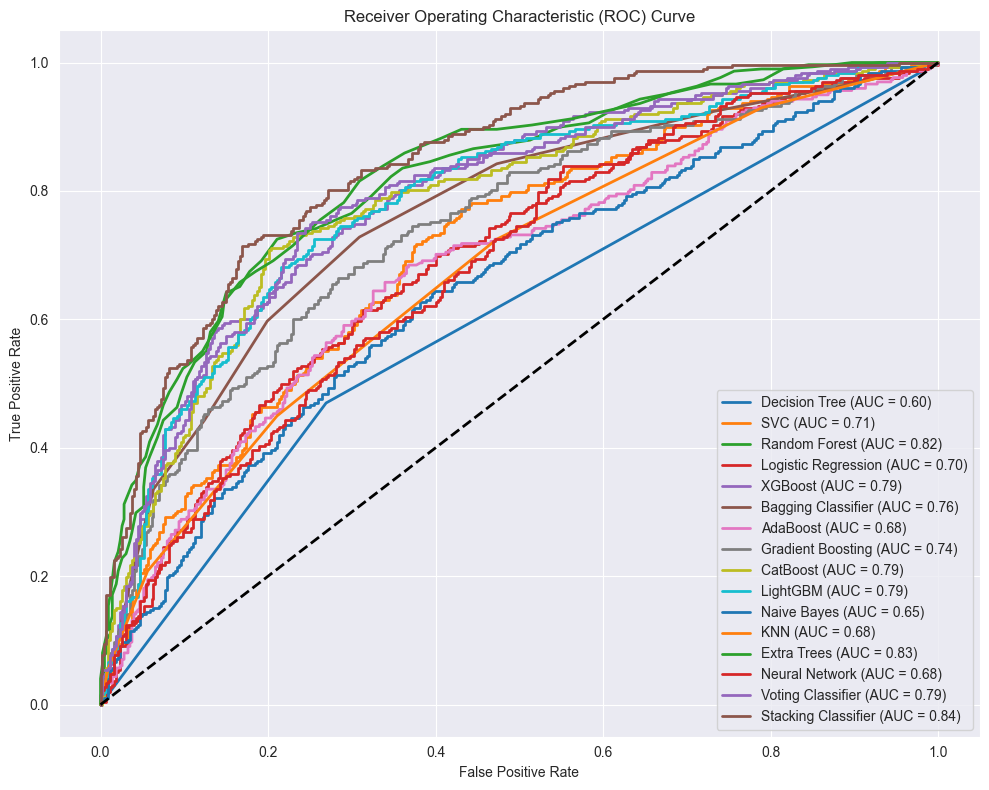

In [ ]:
# Initialize the figure
plt.figure(figsize=(10, 8))

# Loop through each model and plot its ROC curve
for model_name, pipeline in all_pipelines.items():
    # Predict probabilities for the positive class (Class 1)
    y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for class 1
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_encoded, y_prob, pos_label=1)  # Positive class = 1
    roc_auc = auc(fpr, tpr)  # Calculate AUC
    
    # Plot the ROC curve for each model
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (Random classifier line)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
random_forest_pipeline = all_pipelines['Random Forest']
random_forest_smote_y_pred = random_forest_pipeline.predict(X_test)
random_forest_model = random_forest_pipeline.named_steps['classifier']

In [ ]:
stacking_pipeline = all_pipelines['Stacking Classifier']
stacking_smote_y_pred = stacking_pipeline.predict(X_test)
stacking_model = stacking_pipeline.named_steps['classifier']

In [ ]:
print(label_encoder.classes_)  # Shows the class names in order of their indices
print(random_forest_model.classes_)  # For models that expose class labels

['Negative' 'Positive' 'Stable']
[0 1 2]


In [ ]:
random_forest_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Month', 'Year', 'dxy_open', 'is_holiday', 'btc_intraday_volatility',
       'oil_intraday_volatility', 'gold_intraday_volatility',
       'btc_daily_percentage', 'oil_daily_percentage',...
       'btc_yesterday_monthly_avg_pct_change',
       'oil_yesterday_weekly_avg_pct_change',
       'oil_yesterday_monthly_avg_pct_change',
       'gold_yesterday_weekly_avg_pct_change',
       'gold_yesterday_monthly_avg_pct_change'],
      dtype='object'))])),
                ('feature_importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x3230dbf60>)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
stacking_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Month', 'Year', 'dxy_open', 'is_holiday', 'btc_intraday_volatility',
       'oil_intraday_volatility', 'gold_intraday_volatility',
       'btc_daily_percentage', 'oil_daily_percentage',...
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=42, ...)),
                                                ('Extra Trees',
                                                 ExtraTreesClassifier(random_state=42)),
                                                ('CatBoost',
                                                 <catboost.core.CatBoostClassifier object at 0x32cbf44a0>)],
                                    final_estimator=LogisticRegression(random_state=42)))])

#### **Confusion Matrices of 2 top models**

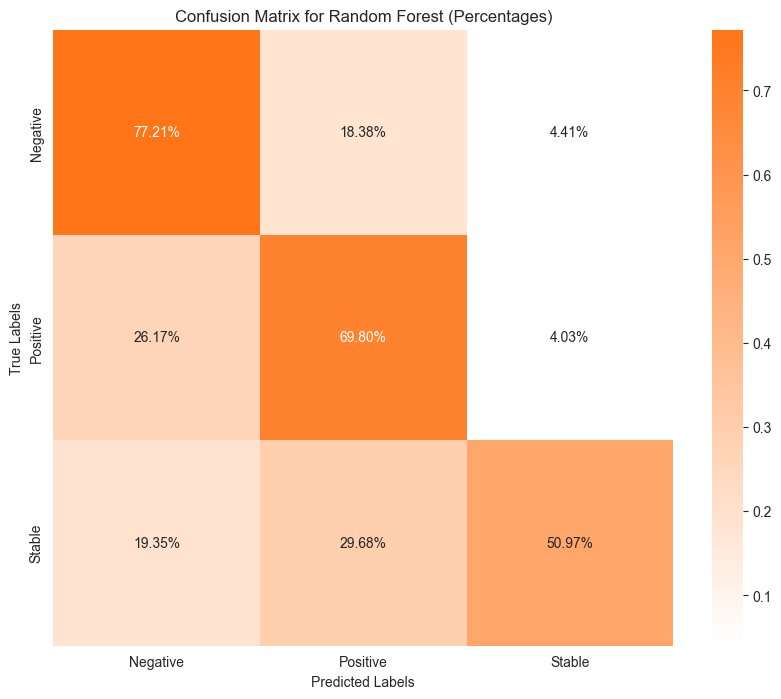

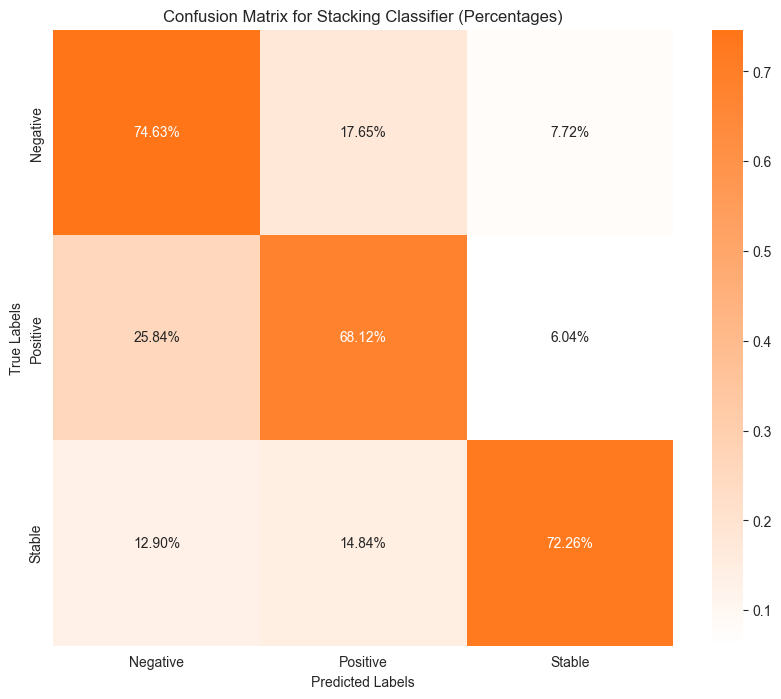

In [ ]:
# Define a custom colormap using the specified color code
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#FF7518"])

# Dynamically retrieve class labels from label_encoder
class_labels = label_encoder.classes_
top_2_pipelines = ['Stacking Classifier', 'Random Forest']

# Loop through the confusion_matrices dictionary for the top 2 pipelines
for model_name, cm in confusion_matrices.items():
    if model_name in top_2_pipelines:  # Filter for top models
        # Normalize the confusion matrix to percentages (optional)
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        # Create a heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap=custom_cmap,  # Use custom colormap
                    xticklabels=class_labels,
                    yticklabels=class_labels, cbar=True)
        
        # Add title and axis labels
        plt.title(f"Confusion Matrix for {model_name} (Percentages)")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        
        # Show the plot
        plt.show()

#### **Feature importance for Random Forest**

In [ ]:
feature_importances = random_forest_model.feature_importances_

# Extract feature names from the preprocessing pipeline
feature_names = []
for transformer in preprocessor.transformers_:
    trans_name, transformer, col_names = transformer
    # Handle cases for pipelines within column transformers or directly applied transformers
    if hasattr(transformer, 'get_feature_names_out'):
        feature_names.extend(transformer.get_feature_names_out(col_names))
    else:
        feature_names.extend(col_names)

# Create a DataFrame for feature importances
rf_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(rf_importances_df)

                                  Feature  Importance
9                   gold_daily_percentage    0.115534
8                    oil_daily_percentage    0.044216
5                 oil_intraday_volatility    0.044192
17      oil_yesterday_intraday_volatility    0.038805
14              gold_rolling_volatility_7    0.038437
12               oil_rolling_volatility_7    0.036864
21        gold_yesterday_daily_percentage    0.036606
26   gold_yesterday_weekly_avg_pct_change    0.036253
2                                dxy_open    0.035955
6                gold_intraday_volatility    0.035712
13              oil_rolling_volatility_30    0.035473
15             gold_rolling_volatility_30    0.034381
24    oil_yesterday_weekly_avg_pct_change    0.034218
25   oil_yesterday_monthly_avg_pct_change    0.033739
11              btc_rolling_volatility_30    0.033605
7                    btc_daily_percentage    0.033504
20         oil_yesterday_daily_percentage    0.033457
23   btc_yesterday_monthly_a

#### **Feature importance for Stacking Classifier**

In [ ]:
# Assuming 'stacking_classifier' is already trained and 'X' has the feature names
feature_names = X.columns.tolist()  # Ensure X is your feature matrix as a DataFrame

# Dictionary to hold the data
data = {'Feature': feature_names}

# Extract feature importances for each model and add them to the dictionary
models = ['Random Forest', 'XGBoost', 'Extra Trees', 'CatBoost']
for model in models:
    if model in stacking_classifier.named_estimators_:
        # Check if the base learner has the attribute 'feature_importances_'
        if hasattr(stacking_classifier.named_estimators_[model], 'feature_importances_'):
            data[model] = stacking_classifier.named_estimators_[model].feature_importances_
        else:
            print(f"{model} does not support feature importances.")
    else:
        print(f"{model} is not a part of the named_estimators in the stacking classifier.")

# Create a DataFrame from the collected data
feature_importances_df = pd.DataFrame(data)

# You might want to normalize these values or transform them in some way
# Normalize the importances to sum to 1 (or 100 for percentage) for each model
for model in models:
    if model in feature_importances_df.columns:
        feature_importances_df[model] /= feature_importances_df[model].sum()

# Optionally, sort the DataFrame by one of the models' importances, e.g., Random Forest
sorted_importances_df = feature_importances_df.sort_values(by='Random Forest', ascending=False)

# Display the DataFrame
print(sorted_importances_df)

                                  Feature  Random Forest   XGBoost  \
9                   gold_daily_percentage       0.115534  0.074134   
8                    oil_daily_percentage       0.044216  0.038862   
5                 oil_intraday_volatility       0.044192  0.044611   
17      oil_yesterday_intraday_volatility       0.038805  0.030919   
14              gold_rolling_volatility_7       0.038437  0.033217   
12               oil_rolling_volatility_7       0.036864  0.031461   
21        gold_yesterday_daily_percentage       0.036606  0.027092   
26   gold_yesterday_weekly_avg_pct_change       0.036253  0.033188   
2                                dxy_open       0.035955  0.035711   
6                gold_intraday_volatility       0.035712  0.028531   
13              oil_rolling_volatility_30       0.035473  0.033138   
15             gold_rolling_volatility_30       0.034381  0.033366   
24    oil_yesterday_weekly_avg_pct_change       0.034218  0.029172   
25   oil_yesterday_m

In [ ]:
# getting base learners weight for meta learner
base_learner_names = stacking_classifier.named_estimators_.keys()

# Meta-learner coefficients
meta_coefficients = stacking_classifier.final_estimator_.coef_
print("Coefficients from the meta-learner:")

for i, coef in enumerate(meta_coefficients):
    print(f"Class {i}:")
    for name, value in zip(base_learner_names, coef):
        print(f"{name}: {value:.4f}")


Coefficients from the meta-learner:
Class 0:
Random Forest: 0.8405
XGBoost: -0.2630
Extra Trees: -0.6229
CatBoost: 0.3502
Class 1:
Random Forest: -0.4441
XGBoost: 0.6827
Extra Trees: -0.2507
CatBoost: -0.0465
Class 2:
Random Forest: -0.3964
XGBoost: -0.4198
Extra Trees: 0.8736
CatBoost: -0.3036


#### **Meta-Learner Coefficients for Base Learners**

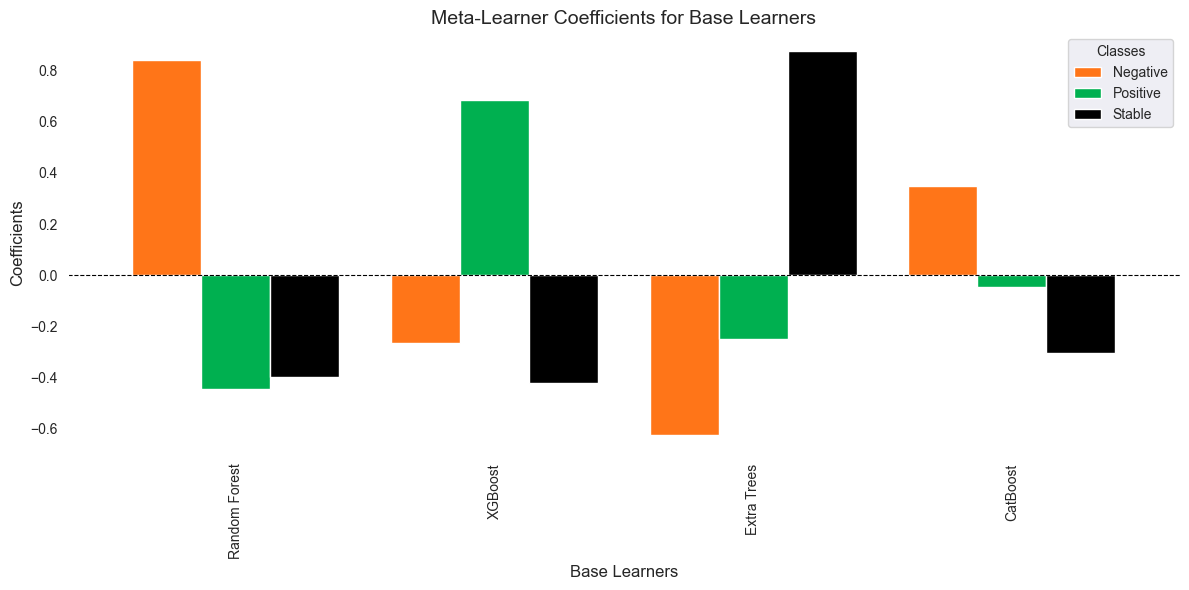

In [ ]:
# Extract the meta-learner's coefficients
meta_learner = stacking_model.final_estimator_
meta_coefficients = meta_learner.coef_[:, :len(base_learner_names)]  # Slice to match the base learners only

# Retrieve the original class names from the LabelEncoder
class_names = label_encoder.classes_  # Assuming label_encoder is used for encoding target variable

# Create a DataFrame for the coefficients
coefficients_df = pd.DataFrame(
    meta_coefficients,  # Coefficients for each class
    columns=base_learner_names,  # Base learner names as columns
    index=class_names  # Use class names as the index
).T  # Transpose for plotting

# Set figure and axes background to white
plt.figure(figsize=(12, 6), facecolor='white')  # White figure background
ax = plt.gca()
ax.set_facecolor('white')  # White axes background

# Plot the coefficients
coefficients_df.plot(
    kind='bar', ax=ax, color=['#FF7518', '#00b050', 'black'], width=0.8
)
plt.title("Meta-Learner Coefficients for Base Learners", fontsize=14)
plt.xlabel("Base Learners", fontsize=12)
plt.ylabel("Coefficients", fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at 0
plt.legend(title="Classes", fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Extract base learner names and their feature importances
base_learners = stacking_classifier.named_estimators_
feature_names = X.columns.tolist()

# Collect feature importances from each base learner
base_learner_importances = {}
for learner_name, learner in base_learners.items():
    if hasattr(learner, "feature_importances_"):
        base_learner_importances[learner_name] = learner.feature_importances_

# Extract meta-learner coefficients
meta_coefficients = stacking_classifier.final_estimator_.coef_

# Average meta-learner coefficients across all classes
meta_learner_weights = np.mean(meta_coefficients, axis=0)

# Initialize weighted importances
weighted_importances = np.zeros(len(feature_names))

# Calculate weighted importances
for i, (learner_name, importances) in enumerate(base_learner_importances.items()):
    weighted_importances += np.array(importances) * meta_learner_weights[i]

# Create a DataFrame of feature importances
importances_df = pd.DataFrame({
    "Feature": feature_names,
    "Weighted Importance": weighted_importances
}).sort_values(by="Weighted Importance", ascending=False)

# Normalize the feature importances to the range 0–1
importances_df["Normalized Importance"] = (
    importances_df["Weighted Importance"] / importances_df["Weighted Importance"].mean()
)
importances_df = importances_df[['Feature', 'Normalized Importance']]
print(importances_df)

                                  Feature  Normalized Importance
9                   gold_daily_percentage               3.078428
8                    oil_daily_percentage               1.813412
26   gold_yesterday_weekly_avg_pct_change               1.249633
24    oil_yesterday_weekly_avg_pct_change               1.159135
14              gold_rolling_volatility_7               1.138648
18     gold_yesterday_intraday_volatility               1.078853
5                 oil_intraday_volatility               1.072755
12               oil_rolling_volatility_7               1.053705
6                gold_intraday_volatility               1.001991
11              btc_rolling_volatility_30               0.984301
10               btc_rolling_volatility_7               0.975885
21        gold_yesterday_daily_percentage               0.951842
25   oil_yesterday_monthly_avg_pct_change               0.945516
15             gold_rolling_volatility_30               0.941973
22    btc_yesterday_weekl

In [ ]:
sorted_importances_df = sorted_importances_df.merge(importances_df,on="Feature")

In [ ]:
sorted_importances_df = sorted_importances_df.merge(rf_importances_df,on="Feature", suffixes=('_stacking', '_random_forest')) 

In [ ]:
sorted_importances_df.rename(columns={'Random Forest': 'Random Forest Stacking', 
                                      'XGBoost': 'XGBoost Stacking',
                                      'Extra Trees': 'Extra Trees	 Stacking',
                                      'CatBoost': 'CatBoost Stacking',
                                      'Normalized Importance': 'Stacking Classifier',
                                      'Importance_random_forest' : 'Random Forest'}, inplace=True)

In [ ]:
sorted_importances_df['Stacking Classifier'] = sorted_importances_df['Stacking Classifier']/sorted_importances_df['Stacking Classifier'].sum()

In [ ]:
sorted_importances_df = sorted_importances_df.sort_values(by='Stacking Classifier', ascending=False)

In [ ]:
sorted_importances_df.columns

Index(['Feature', 'Random Forest Stacking', 'XGBoost Stacking',
       'Extra Trees\t Stacking', 'CatBoost Stacking', 'Stacking Classifier',
       'Importance'],
      dtype='object')

In [ ]:
# Assuming sorted_importances_df is your DataFrame and is already defined with the necessary data
# Ensure it's sorted in descending order by the 'Random Forest' column for example
sorted_importances_df = sorted_importances_df.sort_values(by='Random Forest', ascending=False)

# Plotting 'Random Forest' and 'Stacking Classifier' feature importances
fig, ax = plt.subplots(figsize=(10, 8))

# Selecting a subset of the data for plotting
data_to_plot = sorted_importances_df[['Feature', 'Random Forest', 'Stacking Classifier']].set_index('Feature')

# Creating the bar chart
data_to_plot.plot(kind='barh', ax=ax, color=['black', '#FF7518'])

ax.invert_yaxis()

# Adding labels and title
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importances for Random Forest and Stacking Classifier')

# Show the plot
plt.show()


In [ ]:
sorted_importances_df.columns

Index(['Feature', 'Random Forest Stacking', 'XGBoost Stacking',
       'Extra Trees\t Stacking', 'CatBoost Stacking', 'Stacking Classifier',
       'Random Forest'],
      dtype='object')

#### **Aggregated Feature Importances by Asset for Random Forest and Stacking Classifier**

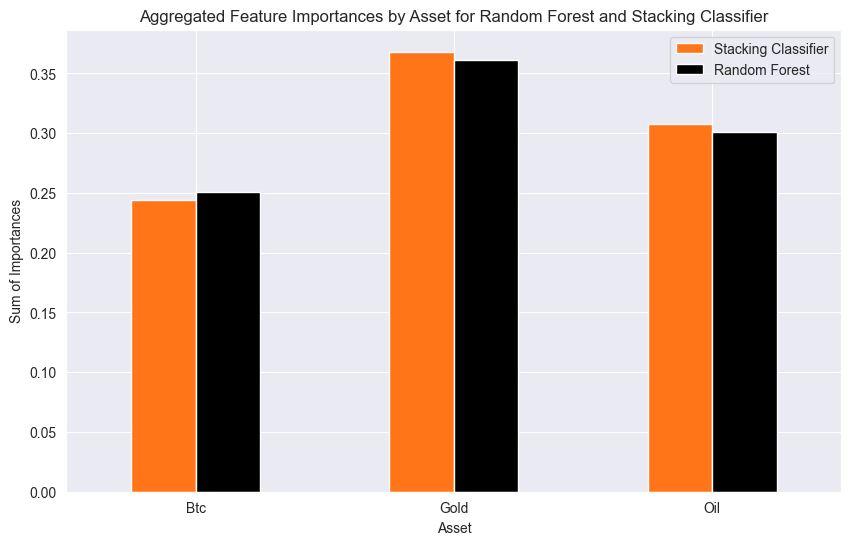

In [ ]:
assets = ['gold', 'oil', 'btc']
# Initialize a new column for asset type
sorted_importances_df['Asset'] = None

# Assign asset type based on the presence of the asset keyword in the 'Feature' names
for asset in assets:
    sorted_importances_df.loc[sorted_importances_df['Feature'].str.contains(asset), 'Asset'] = asset.capitalize()

# Group by asset and sum the importances
asset_importances = sorted_importances_df.groupby('Asset').agg({
    'Stacking Classifier': 'sum',
    'Random Forest': 'sum'
}).reset_index()

# Plotting the grouped data
fig, ax = plt.subplots(figsize=(10, 6))
asset_importances.plot(x='Asset', kind='bar', ax=ax, color=['#FF7518', 'black'])
ax.set_ylabel('Sum of Importances')
ax.set_title('Aggregated Feature Importances by Asset for Random Forest and Stacking Classifier')
ax.set_xticklabels(asset_importances['Asset'], rotation=0)  # Set asset names as labels with no rotation

plt.show()

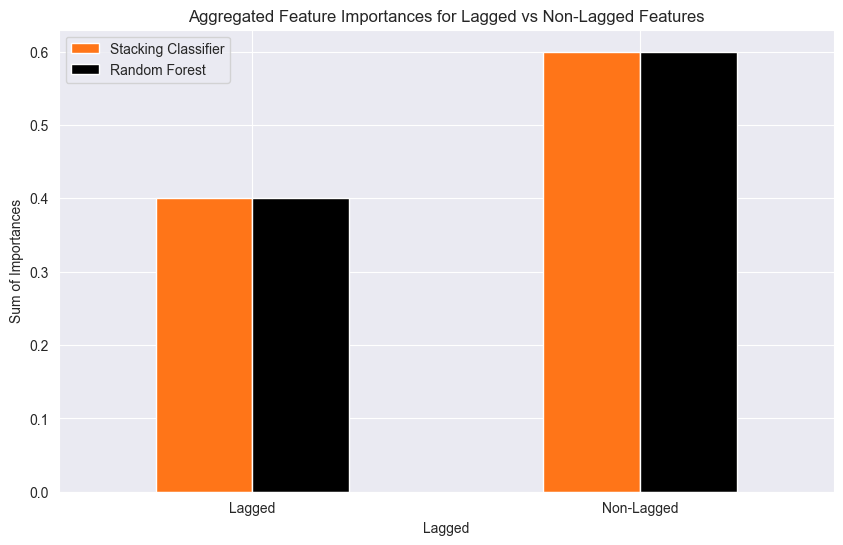

In [ ]:
sorted_importances_df['Lagged'] = sorted_importances_df['Feature'].apply(lambda x: 'Lagged' if 'yesterday' in x else 'Non-Lagged')

# Group by the 'Lagged' classification and sum the importances for the two specified columns
lagged_importances = sorted_importances_df.groupby('Lagged').agg({
    'Stacking Classifier': 'sum',
    'Random Forest': 'sum'
}).reset_index()

# Plotting the grouped data
fig, ax = plt.subplots(figsize=(10, 6))
lagged_importances.plot(x='Lagged', kind='bar', ax=ax, color=['#FF7518', 'black'])
ax.set_ylabel('Sum of Importances')
ax.set_title('Aggregated Feature Importances for Lagged vs Non-Lagged Features')
ax.set_xticklabels(lagged_importances['Lagged'], rotation=0)  # Set labels as Lagged and Non-Lagged with no rotation

plt.show()

In [ ]:
lagged_importances.head()

Lagged  Stacking Classifier  Random Forest
0      Lagged             0.400296        0.40082
1  Non-Lagged             0.599704        0.59918

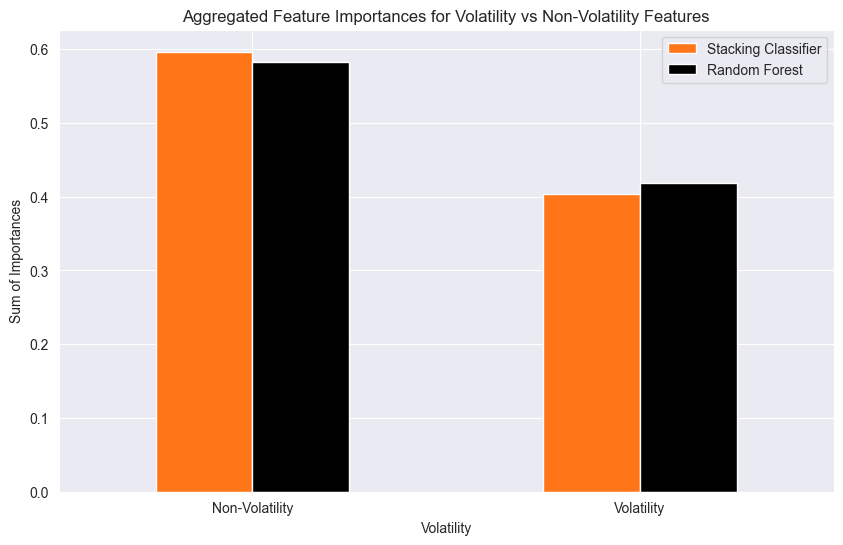

In [ ]:
# Assuming sorted_importances_df is your DataFrame loaded with the necessary data
# Identify volatility features
sorted_importances_df['Volatility'] = sorted_importances_df['Feature'].apply(lambda x: 'Volatility' if 'volatility' in x else 'Non-Volatility')

# Group by the 'Volatility' classification and sum the importances for the two specified columns
volatility_importances = sorted_importances_df.groupby('Volatility').agg({
    'Stacking Classifier': 'sum',
    'Random Forest': 'sum'
}).reset_index()

# Plotting the grouped data
fig, ax = plt.subplots(figsize=(10, 6))
volatility_importances.plot(x='Volatility', kind='bar', ax=ax, color=['#FF7518', 'black'])
ax.set_ylabel('Sum of Importances')
ax.set_title('Aggregated Feature Importances for Volatility vs Non-Volatility Features')
ax.set_xticklabels(volatility_importances['Volatility'], rotation=0)  # Set labels as Volatility and Non-Volatility with no rotation
plt.show()

### **`Deployment`**

#### **Model Persistance**

In [ ]:
joblib.dump(random_forest_pipeline, 'random_forest.joblib')
joblib.dump(stacking_pipeline, 'stacking_classifier.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

#### **Business Case**

Once the model predicts the movement of the DXY (U.S. Dollar Index), the focus shifts to portfolio allocation. Two distinct strategies are proposed based on the prediction:

- Minimizing risk. 
- Maximizing returns.